In [626]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay
)
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sys


In [627]:
df = pd.read_csv("mental_health2425v8in.csv")
df.head()

,year_1,state_1,general_health,phq9_1,phq9_2,phq9_3,phq9_4,phq9_5,phq9_6,phq9_7,...,acha_12months_any_comp,sex,fulltime,international,race_1,race_2,race_3,race_4,race_5,race_6
0,2000,MD,Very Good,Several days,Several days,Not at all,Several days,Not at all,Not at all,More than half of the days,...,2,Female,Yes,No,NaN,NaN,NaN,Asian or Pacific Islander,NaN,NaN
1,2001,SC,Good,More than half of the days,More than half of the days,Nearly every day,Nearly every day,Nearly every day,Several days,Nearly every day,...,0,Female,Yes,No,NaN,NaN,NaN,Asian or Pacific Islander,NaN,NaN
2,1999,NJ,Good,Several days,Several days,More than half of the days,More than half of the days,Several days,Several days,Several days,...,2,Female,Yes,No,NaN,NaN,Hispanic or Latino,Asian or Pacific Islander,NaN,NaN
3,1998,NY,Good,Several days,Several days,Nearly every day,Nearly every day,Not at all,Several days,Several days,...,2,Female,Yes,No,White - not Hispanic (includes Middle Eastern),NaN,NaN,NaN,NaN,NaN
4,2000,PA,Very Good,Not at all,Several days,Several days,Several days,Several days,Several days,Several days,...,5,Female,Yes,No,White - not Hispanic (includes Middle Eastern),NaN,NaN,NaN,NaN,NaN


In [628]:
df.describe()

,year_1,phq9_1NUM,phq9_2NUM,phq9_3NUM,phq9_4NUM,phq9_5NUM,phq9_6 NUM,phq9_7NUM,phq9_8NUM,phq9_9NUM,...,acha_12months_any_21NUM,acha_12months_any_22NUM,acha_12months_any_23NUM,acha_12months_any_24NUM,acha_12months_any_25NUM,acha_12months_any_26NUM,acha_12months_any_27NUM,acha_12months_any_28NUM,acha_12months_any_29NUM,acha_12months_any_comp
count,579.000000,579.00000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,...,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.00000
mean,1998.398964,1.02418,1.065630,1.343696,1.568221,1.226252,1.122625,1.188256,0.438687,0.395509,...,0.041451,0.017271,0.063903,0.005181,0.012090,0.005181,0.193437,0.084629,0.003454,2.97582
std,5.403260,0.90334,0.935189,0.998792,0.968407,1.043484,1.042599,1.017562,0.765354,0.767448,...,0.199503,0.130393,0.244792,0.071857,0.109381,0.071857,0.395334,0.278569,0.058722,2.48374
min,1971.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1998.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,2000.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000
75%,2001.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000
max,2003.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.00000


**Interpretation:** The df.describe() output provides a summary of 49 numerical columns from a dataset of 579 U.S. college students, showing descriptive statistics for key mental health and demographic variables. Overall, the statistics provide insight into the distribution, central tendency, and variability of depression-related symptoms and other health indicators in the dataset.

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Columns: 118 entries, year_1 to race_6
dtypes: int64(49), object(69)
memory usage: 533.9+ KB


**Interpretation:** The output of df.info() shows that the dataset contains 579 records (rows) and 118 columns. Among these:

* 49 columns are numerical (int64), likely representing encoded survey responses, scores (e.g., PHQ-9, GAD-7), and other binary or ordinal variables.

* 69 columns are of type object, typically indicating text-based data such as categorical responses, names of conditions, or survey answers that haven’t been encoded yet.

* The total memory usage is about 534 KB

**DATA CLEANING AND PREPARATION**

In [630]:
# Dropping Unnecessary Columns
data= df.drop(['phq9_1', 'phq9_2', 'phq9_3', 'phq9_4', 'phq9_5', 'phq9_6','phq9_7', 'phq9_8', 'phq9_9','phq9_1NUM', 'phq9_2NUM', 'phq9_3NUM',
               'phq9_4NUM', 'phq9_5NUM','phq9_6 NUM','phq9_7NUM','phq9_8NUM', 'phq9_9NUM','gad7_1', 'gad7_2', 'gad7_3', 'gad7_4', 'gad7_5', 'gad7_6',
               'gad7_7', 'gad7_1NUM', 'gad7_2NUM', 'gad7_3NUM', 'gad7_4NUM', 'gad7_5NUM','gad7_6NUM', 'gad7_7NUM','acha_12months_any_1',
               'acha_12months_any_2', 'acha_12months_any_3', 'acha_12months_any_4','acha_12months_any_5','acha_12months_any_6',
               'acha_12months_any_7','acha_12months_any_8','acha_12months_any_9','acha_12months_any_10', 'acha_12months_any_11',
               'acha_12months_any_12','acha_12months_any_13', 'acha_12months_any_14','acha_12months_any_15','acha_12months_any_16',
               'acha_12months_any_17','acha_12months_any_18','acha_12months_any_19','acha_12months_any_20','acha_12months_any_21',
               'acha_12months_any_22','acha_12months_any_23','acha_12months_any_24','acha_12months_any_25',
               'acha_12months_any_26','acha_12months_any_27','acha_12months_any_28','acha_12months_any_29','acha_12months_any_1NUM',
               'acha_12months_any_2NUM','acha_12months_any_3NUM','acha_12months_any_4NUM','acha_12months_any_5NUM','acha_12months_any_6NUM',
               'acha_12months_any_7NUM','acha_12months_any_8NUM','acha_12months_any_9NUM','acha_12months_any_10NUM','acha_12months_any_11NUM',
               'acha_12months_any_12NUM','acha_12months_any_13NUM','acha_12months_any_14NUM','acha_12months_any_15NUM','acha_12months_any_16NUM',
               'acha_12months_any_17NUM','acha_12months_any_18NUM','acha_12months_any_19NUM','acha_12months_any_20NUM','acha_12months_any_21NUM',
               'acha_12months_any_22NUM','acha_12months_any_23NUM','acha_12months_any_24NUM','acha_12months_any_25NUM','acha_12months_any_26NUM',
               'acha_12months_any_27NUM','acha_12months_any_28NUM','acha_12months_any_29NUM','international','fulltime',
               'acha_services_1','acha_services_3',], axis=1)

In [631]:
# Rename column names
data.rename(columns={
    'acha_depression': 'Previously_Diagnosed_Depression',
    'acha_services_2': 'In_Therapy_for_Depression',
    'acha_12months_any_comp': 'Total_Health_Issues_Score',
    'acha_12months_times_1': 'Hopeless',
    'acha_12months_times_2': 'Overwhelmed',
    'acha_12months_times_3': 'Exhausted (not physical)',
    'acha_12months_times_4': 'Very sad',
    'acha_12months_times_5': 'Depressed - hard to function',
    'acha_12months_times_6': 'Seriously considered suicide',
    'acha_12months_times_7': 'Attempted suicide'
}, inplace=True)

In [632]:
# Calculate Age
data['Age'] = 2022 - data['year_1']

**Interpretation:** The Age of each respondent is calculated by subtracting the value in the year_1 column from the year 2022. The year_1 variable represents the respondent's year of birth, so this operation estimates their age at the time of data analysis or survey administration. This derived Age variable is important for subsequent analyses, as age can be a significant factor in understanding trends related to mental health severity, anxiety, and other health-related variables among college students.

In [633]:
# The column was mapped to numeric values as General_Health for analysis
df_data2 = {
    'Poor': 1, 'Fair': 2, 'Good': 3, 'Very Good': 4, 'Excellent': 5
}
data['General_Health'] = data['general_health'].map(df_data2)
data.drop(columns=['general_health'], inplace=True)

In [634]:
# Columns were transformed from categorical frequency responses into a numeric
hopeless = {
    "Never": 0,
    "1-2 times": 1,
    "3-4 times": 2,
    "5-6 times": 3,
    "7-8 times": 4,
    "9-10 times": 5,
    "11 or more times": 6
}
data['Hopeless'] = data['Hopeless'].map(hopeless)

In [635]:
overwhelmed = {
    "Never": 0,
    "1-2 times": 1,
    "3-4 times": 2,
    "5-6 times": 3,
    "7-8 times": 4,
    "9-10 times": 5,
    "11 or more times": 6
}
data['Overwhelmed'] = data['Overwhelmed'].map(overwhelmed)

In [636]:
exhausted = {
    "Never": 0,
    "1-2 times": 1,
    "3-4 times": 2,
    "5-6 times": 3,
    "7-8 times": 4,
    "9-10 times": 5,
    "11 or more times": 6
}

data['Exhausted (not physical)'] = data['Exhausted (not physical)'].map(exhausted)

In [637]:
very_sad = {
    "Never": 0,
    "1-2 times": 1,
    "3-4 times": 2,
    "5-6 times": 3,
    "7-8 times": 4,
    "9-10 times": 5,
    "11 or more times": 6
}
data['Very sad'] = data['Very sad'].map(very_sad)

In [638]:
depressed = {
    "Never": 0,
    "1-2 times": 1,
    "3-4 times": 2,
    "5-6 times": 3,
    "7-8 times": 4,
    "9-10 times": 5,
    "11 or more times": 6
}
data['Depressed - hard to function'] = data['Depressed - hard to function'].map(depressed)

In [639]:
considered_suicide = {
    "Never": 0,
    "1-2 times": 1,
    "3-4 times": 2,
    "5-6 times": 3,
    "7-8 times": 4,
    "9-10 times": 5,
    "11 or more times": 6
}
data['Seriously considered suicide'] = data['Seriously considered suicide'].map(considered_suicide)

In [640]:
attempted_suicide = {
    "Never": 0,
    "1-2 times": 1,
    "3-4 times": 2,
    "5-6 times": 3,
    "7-8 times": 4,
    "9-10 times": 5,
    "11 or more times": 6
}
data['Attempted suicide'] = data['Attempted suicide'].map(attempted_suicide)

In [641]:
# Convert 'sex' column to : Male as 0 and Female as 1
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

In [642]:
# Mapping the PHQ-9 severity categories to numerical scores for easier analysis and modeling
phq9_severity_score = {
    'Minimal depression': 0,
    'Mild depression': 1,
    'Moderate depression': 2,
    'Moderately severe depression': 3,
    'Severe depression': 4
}
data['Depression_Severity_Score'] = data['phq9_severity'].map(phq9_severity_score)

In [643]:
# Mapping the GAD-7 anxiety severity categories to numerical scores
Anxiety_severity_score = {
    'minimal anxiety': 0,
    'mild anxiety': 1,
    'moderate anxiety': 2,
    'severe anxiety': 3
}
data['Anxiety_Severity_Score'] = data['gad7_severity'].map(Anxiety_severity_score)

In [644]:
# Convert 'Previously_Diagnosed_Depression' from categorical 'Yes'/'No' to numerical values
# 'No': 0, 'Yes': 1
# Fill any missing values with 2 to indicate unknown or missing diagnosis status

data['Previously_Diagnosed_Depression'] = data['Previously_Diagnosed_Depression'].map({
    'No': 0,
    'Yes': 1
})
data['Previously_Diagnosed_Depression'] = data['Previously_Diagnosed_Depression'].fillna(2)

In [645]:
# Map 'In_Therapy_for_Depression' from categorical to numeric: 'No' = 0, 'Yes' = 1
# Fill missing values with 2 (indicating unknown/missing)

data['In_Therapy_for_Depression'] = data['In_Therapy_for_Depression'].map({'No': 0, 'Yes': 1}).fillna(2).astype(int)

In [646]:
# Create binary target variable from Anxiety Severity Score
# 0 = No Anxiety, 1 = Mild to Severe Anxiety
data['Anxiety_Severity'] = data['Anxiety_Severity_Score'].apply(lambda x: 0 if x == 0 else 1)

**VISUALIZATIONS**

In [647]:
data.columns

Index(['year_1', 'state_1', 'phq9_COMP', 'phq9_severity', 'gad7_COMP',
       'gad7_severity', 'Hopeless', 'Overwhelmed', 'Exhausted (not physical)',
       'Very sad', 'Depressed - hard to function',
       'Seriously considered suicide', 'Attempted suicide',
       'Previously_Diagnosed_Depression', 'In_Therapy_for_Depression',
       'Total_Health_Issues_Score', 'sex', 'race_1', 'race_2', 'race_3',
       'race_4', 'race_5', 'race_6', 'Age', 'General_Health',
       'Depression_Severity_Score', 'Anxiety_Severity_Score',
       'Anxiety_Severity'],
      dtype='object')

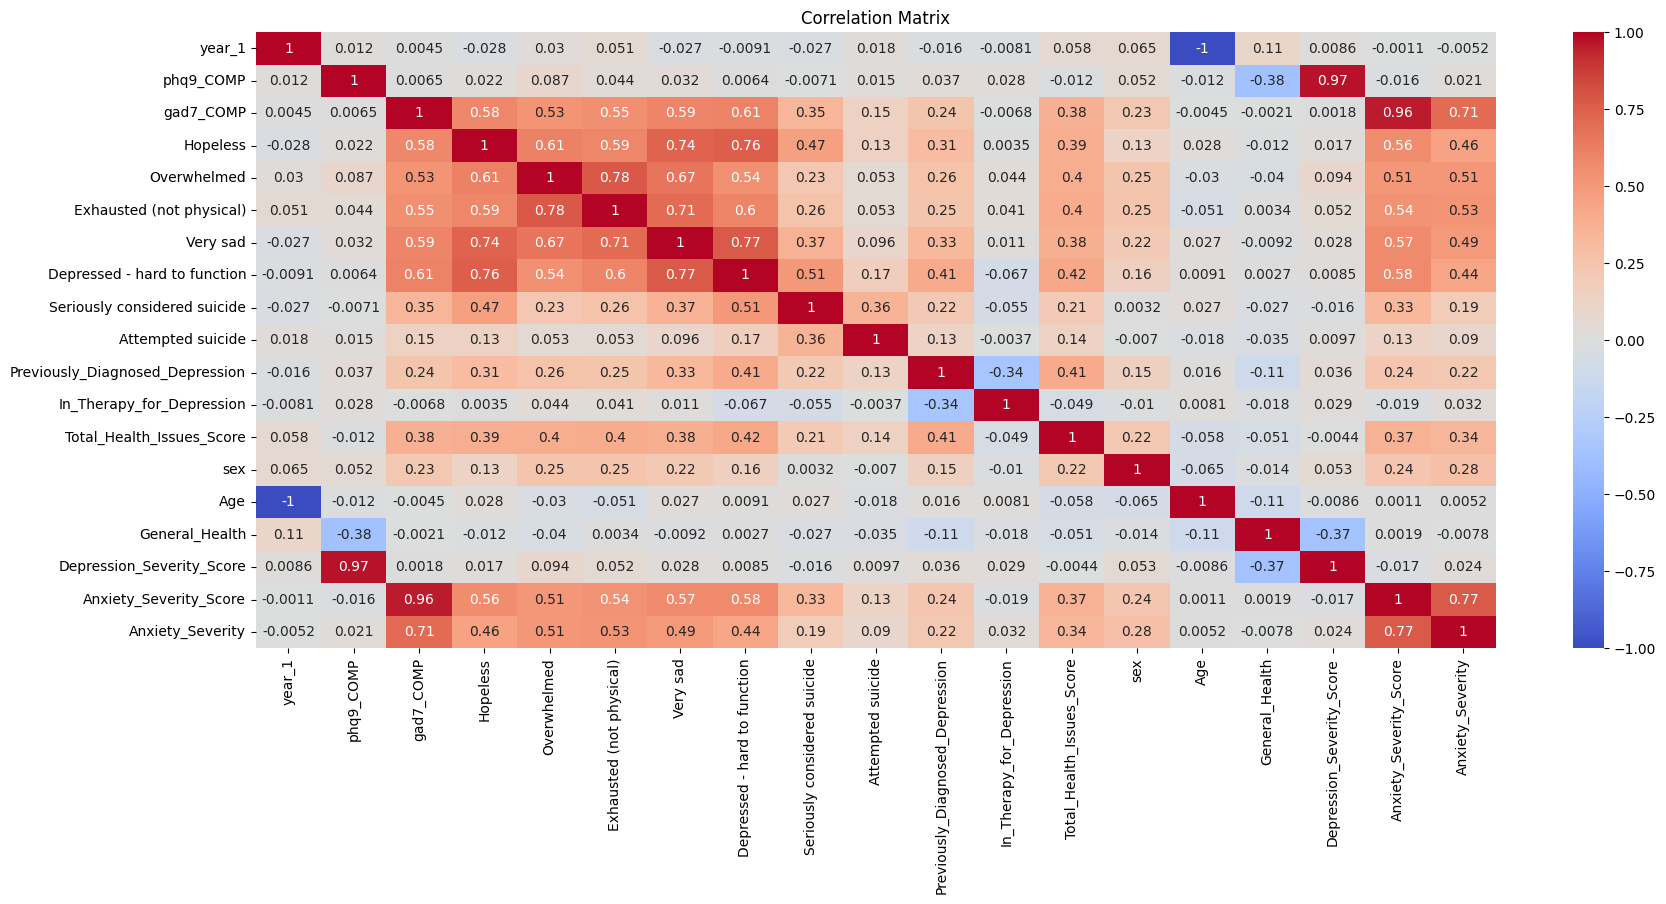

In [648]:
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Interpretation:** The correlation matrix represents the strength and direction of relationships between variables in the dataset. Mental health symptoms such as feeling "Depressed - hard to function", "Overwhelmed", and "Hopeless" are highly correlated with both depression and anxiety scores, suggesting they are key indicators of psychological distress. Strong correlations are also observed among suicide-related variables like "Seriously considered suicide", "Attempted suicide", and "Depressed - hard to function", reinforcing their close association.

General_Health is negatively correlated with both Depression_Severity_Score or phq9_COMP, indicating that individuals with poorer mental health perceive their general health as worse. Lastly, sex and age show very weak or no meaningful correlation with mental health indicators, implying these demographic factors may not directly influence the severity scores.

/tmp/ipython-input-649-1379579586.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


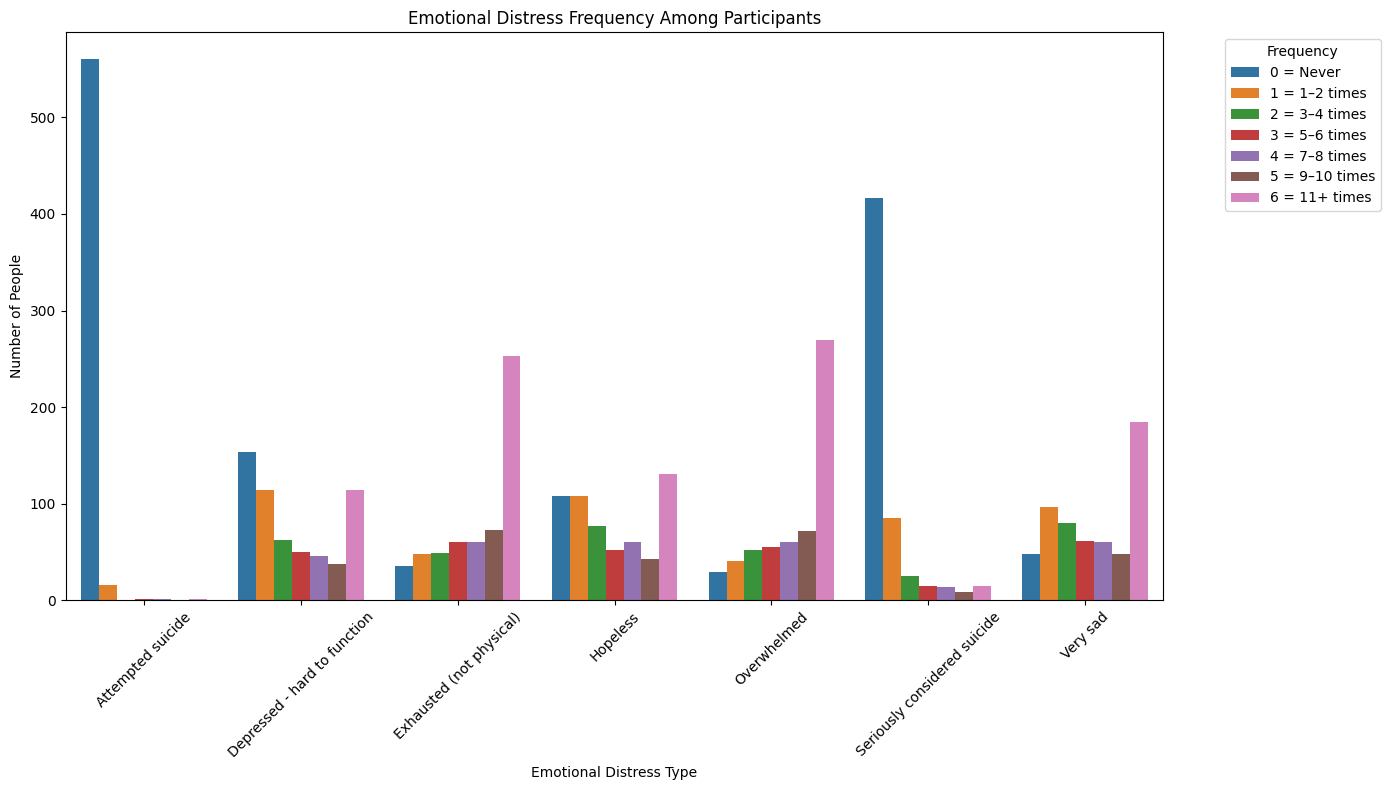

In [649]:
emotions = [
    'Hopeless',
    'Overwhelmed',
    'Exhausted (not physical)',
    'Very sad',
    'Depressed - hard to function',
    'Seriously considered suicide',
    'Attempted suicide'
]

long_df = pd.melt(data, value_vars=emotions,
                  var_name='Emotion', value_name='Frequency')

freq_counts = (long_df
               .groupby(['Emotion', 'Frequency'])
               .size()
               .reset_index(name='Count'))

freq_labels = {
    0: '0 = Never',
    1: '1 = 1–2 times',
    2: '2 = 3–4 times',
    3: '3 = 5–6 times',
    4: '4 = 7–8 times',
    5: '5 = 9–10 times',
    6: '6 = 11+ times'
}
freq_counts['Frequency_Label'] = freq_counts['Frequency'].map(freq_labels)

freq_order = [
    '0 = Never', '1 = 1–2 times', '2 = 3–4 times', '3 = 5–6 times',
    '4 = 7–8 times', '5 = 9–10 times', '6 = 11+ times'
]

plt.figure(figsize=(14, 8))
sns.barplot(
    data=freq_counts,
    x='Emotion',
    y='Count',
    hue='Frequency_Label',
    hue_order=freq_order,
    ci=None
)

plt.title('Emotional Distress Frequency Among Participants')
plt.xlabel('Emotional Distress Type')
plt.ylabel('Number of People')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation:** The bar plot illustrates the frequency of various emotional distress experiences among participants. Notably, the majority reported never attempting suicide or seriously considering suicide, indicating these severe responses were less common. However, high frequencies (11+ times) were reported for feelings of exhaustion (not physical), overwhelm, and sadness, suggesting these are more prevalent and persistent emotional struggles. A significant number also reported experiencing feelings like hopelessness and difficulty functioning due to depression multiple times. This distribution highlights that while extreme behaviors like suicidal actions are less frequent, chronic emotional distress is widespread among participants and warrants attention in mental health assessments and interventions.

In [650]:
data['Race'] = data[['race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'race_6']].bfill(axis=1).iloc[:, 0]
data.drop(columns=['race_1', 'race_2', 'race_3', 'race_4', 'race_5', 'race_6'], inplace=True)
data['Race'] = data['Race'].astype('category')

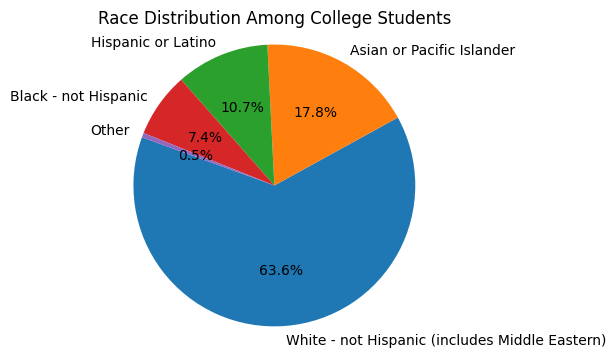

In [651]:
race_counts = data['Race'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(race_counts.values, labels=race_counts.index, autopct='%1.1f%%', startangle=160)
plt.title('Race Distribution Among College Students')
plt.axis('equal')
plt.show()

**Interpretation:** The pie chart illustrates the racial distribution among college students in the dataset. The majority of students identify as White - not Hispanic (including Middle Eastern), comprising 63.6% of the total population. This is followed by Asian or Pacific Islander students at 17.8%, and Hispanic or Latino students at 10.7%. Black - not Hispanic students make up 7.4%, while those identifying as “Other” represent only 0.5%. This distribution indicates a predominance of White students, with comparatively lower representation from other racial and ethnic groups.

/tmp/ipython-input-652-2568863965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='phq9_severity', y='sex', data=data, palette='pastel')


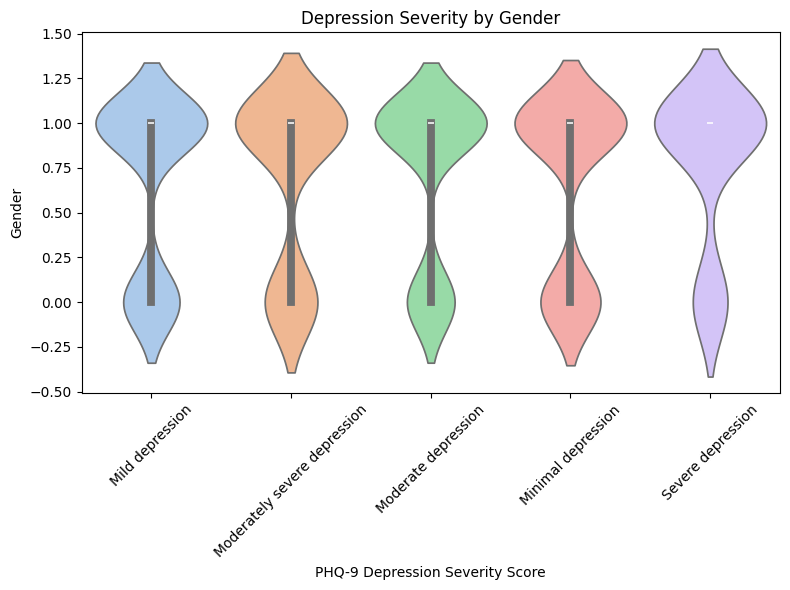

In [652]:
plt.figure(figsize=(8,6))
sns.violinplot(x='phq9_severity', y='sex', data=data, palette='pastel')
plt.title('Depression Severity by Gender')
plt.xlabel('PHQ-9 Depression Severity Score')
plt.ylabel('Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation:** The violin plot displays the distribution of PHQ-9 (depression severity scores) across genders. Each depression category-ranging from minimal to severe-is represented by a violin shape, showing the density of participants for each gender (where 0 likely represents males and 1 represents females). Overall, the distribution appears relatively balanced across genders for each severity level, though the female group shows slightly higher density in categories like moderate and moderately severe depression. This suggests that while both genders experience various levels of depression, females may be more represented in higher severity categories. The plot provides a visual cue that depression severity is prevalent across both genders but may impact females more frequently or intensely in certain categories.

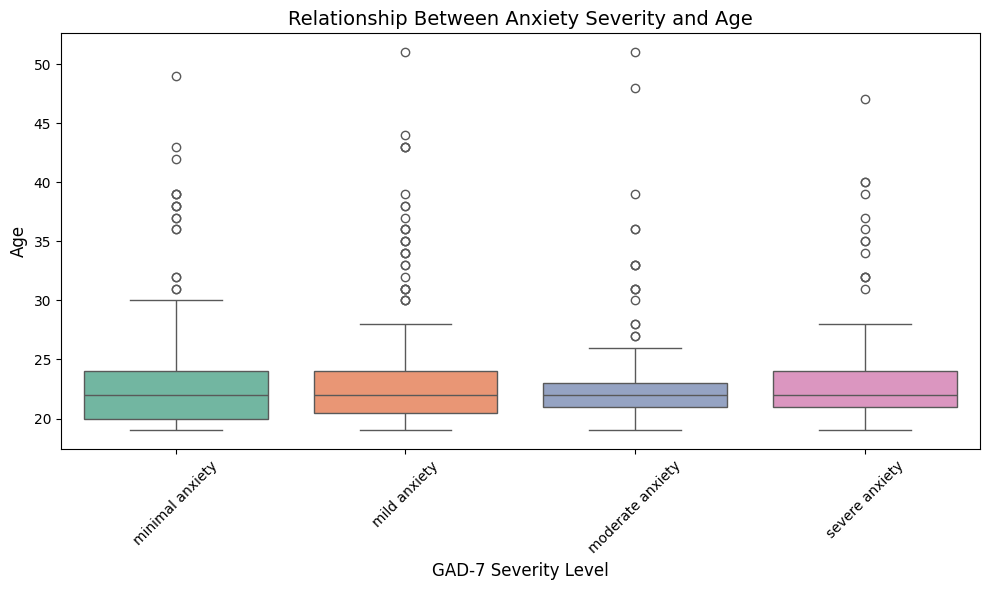

In [653]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='gad7_severity',
    y='Age',
    hue='gad7_severity',
    data=data,
    palette='Set2',
    legend=False
)
plt.title('Relationship Between Anxiety Severity and Age', fontsize=14)
plt.xlabel('GAD-7 Severity Level', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation:**

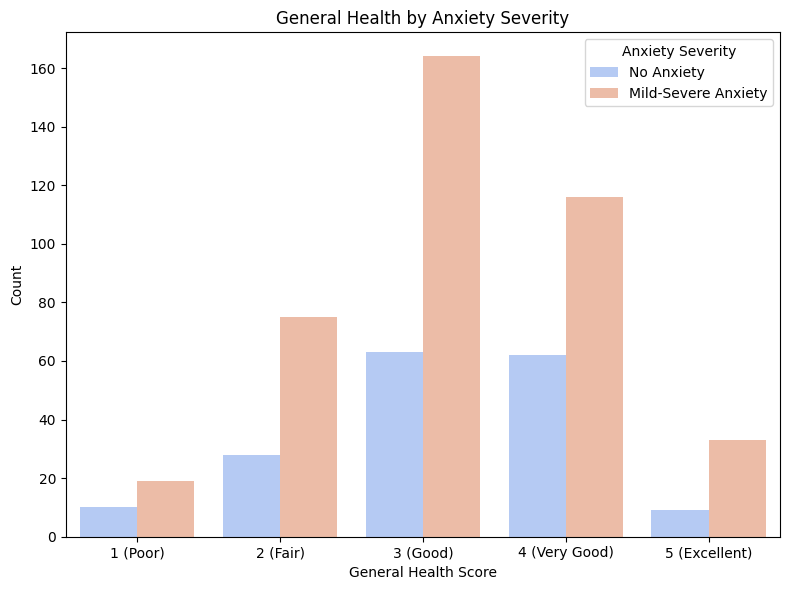

In [654]:
health = {
    1: 'Poor',
    2: 'Fair',
    3: 'Good',
    4: 'Very Good',
    5: 'Excellent'
}

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='General_Health', hue='Anxiety_Severity', palette='coolwarm')
plt.title('General Health by Anxiety Severity')
plt.xlabel('General Health Score')
plt.ylabel('Count')
plt.legend(title='Anxiety Severity', labels=['No Anxiety', 'Mild-Severe Anxiety'])
tick_labels = [f'{i} ({health[i]})' for i in sorted(health.keys())]
plt.xticks(ticks=range(len(tick_labels)), labels=tick_labels)
plt.tight_layout()
plt.show()

**Interpretation:**

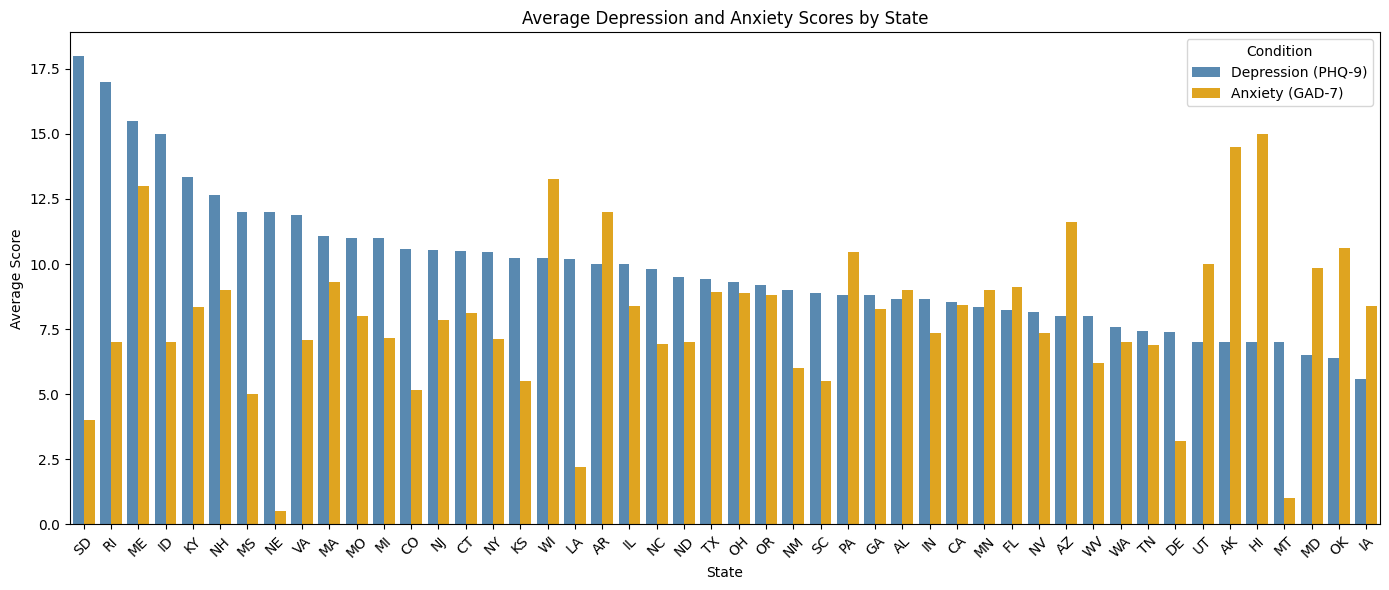

In [655]:
state_avg = data.groupby('state_1')[['phq9_COMP', 'gad7_COMP']].mean().reset_index()
state_avg = state_avg.sort_values(by='phq9_COMP', ascending=False)
state_melted = pd.melt(state_avg, id_vars='state_1', value_vars=['phq9_COMP', 'gad7_COMP'],
                       var_name='Condition', value_name='Average Score')
state_melted['Condition'] = state_melted['Condition'].replace({
    'phq9_COMP': 'Depression (PHQ-9)',
    'gad7_COMP': 'Anxiety (GAD-7)'
})
custom_palette = {
    'Depression (PHQ-9)': '#4B8BBE',
    'Anxiety (GAD-7)': '#FFB000'
}
# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=state_melted, x='state_1', y='Average Score', hue='Condition', palette=custom_palette)
plt.title('Average Depression and Anxiety Scores by State')
plt.xlabel('State')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.tight_layout()
plt.show()

**Interpretation:**

**DESCRIPTIVE STATISTICS**

In [656]:
# For Anxiety using chi2 for categorical values
categorical_vars = [
    'sex',
    'Previously_Diagnosed_Depression',
    'In_Therapy_for_Depression', 'Total_Health_Issues_Score', 'Depression_Severity_Score','Hopeless', 'Overwhelmed', 'Exhausted (not physical)',
       'Very sad', 'Depressed - hard to function',
       'Seriously considered suicide', 'Attempted suicide','Race'
]
results = []
for var in categorical_vars:
    contingency = pd.crosstab(data[var], data['gad7_severity'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    results.append({'Variable': var, 'p-value': p})
chi_square_results = pd.DataFrame(results)
chi_square_results = chi_square_results.sort_values(by='p-value')
chi_square_results['Significant (<0.05)'] = chi_square_results['p-value'] < 0.05
chi_square_results

,Variable,p-value,Significant (<0.05)
9,Depressed - hard to function,2.675725e-47,True
8,Very sad,1.140630e-41,True
7,Exhausted (not physical),1.484494e-38,True
5,Hopeless,5.617337e-37,True
6,Overwhelmed,3.403522e-34,True
3,Total_Health_Issues_Score,4.244773e-20,True
10,Seriously considered suicide,4.971903e-13,True
0,sex,2.559304e-10,True
1,Previously_Diagnosed_Depression,8.383576e-08,True
2,In_Therapy_for_Depression,2.329720e-03,True


**Interpretation:** The chi-square tests were conducted to examine the association between categorical variables and anxiety severity levels (GAD-7 severity). The chi-square analysis revealed that several emotional distress variables—including “Depressed - hard to function,” “Very sad,” “Exhausted (not physical),” “Hopeless,” and “Overwhelmed”-were highly significantly associated with anxiety severity levels (p < 0.001), suggesting a strong link between these emotional states and elevated anxiety. Additionally, health-related variables such as Total Health Issues Score and a history of depression diagnosis were also significantly related to anxiety severity. Demographic and treatment-related variables like sex and being in therapy for depression showed significant associations as well, indicating potential gender and care-seeking differences in anxiety outcomes. On the other hand, Race and Depression Severity Score did not show statistically significant associations (p > 0.05), suggesting that these factors may not have a strong influence on anxiety severity.


In [657]:
# For Anxiety using Anova for numerical values
numeric_vars = [
    'Age',
    'General_Health'

]
target = 'gad7_severity'
results = []
for var in numeric_vars:
    # Drop missing values
    subset = data[[var, target]].dropna()
    # Group values by each category of target
    groups = [group[var].values for _, group in subset.groupby(target)]
    # Run ANOVA
    if len(groups) > 1:
        f_stat, p = f_oneway(*groups)
        results.append({'Variable': var, 'p-value': p, 'Significant (<0.05)': p < 0.05})
    else:
        results.append({'Variable': var, 'p-value': None, 'Significant (<0.05)': False})
anova_results = pd.DataFrame(results).sort_values(by='p-value', na_position='last').reset_index(drop=True)
anova_results

,Variable,p-value,Significant (<0.05)
0,Age,0.618836,False
1,General_Health,0.984618,False


**Interpretation:** The ANOVA analysis examined whether the mean values of numerical variables-Age and General Health-differed significantly across levels of anxiety severity. The results indicated that neither variable showed a statistically significant relationship with anxiety severity (p-values of 0.6188 and 0.9846, respectively). This suggests that, within this dataset, participants' age and their self-reported general health do not significantly influence or vary by the severity of anxiety symptoms. Therefore, these numerical factors may not be strong predictors of anxiety levels in this college student population.

**FEATURE SELECTION**

In [658]:
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# predictors and target
predictors = [
    'sex', 'Age', 'Race', 'Previously_Diagnosed_Depression',
    'Total_Health_Issues_Score', 'In_Therapy_for_Depression',
    'Hopeless', 'Very sad', 'Depression_Severity_Score',
    'Overwhelmed', 'Exhausted (not physical)',
    'Depressed - hard to function', 'Attempted suicide'
]
target = 'Anxiety_Severity'

# Select data and drop missing rows
data_model = data[predictors + [target]].dropna()

X = data_model[predictors]
y = data_model[target]

# Define categorical and numerical columns properly
categorical_cols = ['sex', 'Race']
numeric_cols = [
    'Age', 'Previously_Diagnosed_Depression', 'In_Therapy_for_Depression',
    'Total_Health_Issues_Score', 'Hopeless', 'Very sad', 'Depression_Severity_Score',
    'Overwhelmed', 'Exhausted (not physical)', 'Depressed - hard to function', 'Attempted suicide'
]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ("num", StandardScaler(), numeric_cols)
])

**DATA TRANSFORMATION**

In [659]:
# Fit on train, transform train and test
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

**HANDLING CLASS IMBALANCE**

In [660]:
# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_encoded, y_train)

**LOGISTIC REGRESSION**

In [661]:
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs')
log_model.fit(X_train_res, y_train_res)
y_test_pred = log_model.predict(X_test_encoded)
y_train_pred = log_model.predict(X_train_res)


In [662]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average='weighted', zero_division=0))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted', zero_division=0))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


Logistic Regression (Test) Performance:
Accuracy: 0.7931034482758621
Precision: 0.8013867560147052
Recall: 0.7931034482758621
F1 Score: 0.796264367816092

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.67        34
           1       0.87      0.83      0.85        82

    accuracy                           0.79       116
   macro avg       0.75      0.77      0.76       116
weighted avg       0.80      0.79      0.80       116

Confusion Matrix:
 [[24 10]
 [14 68]]


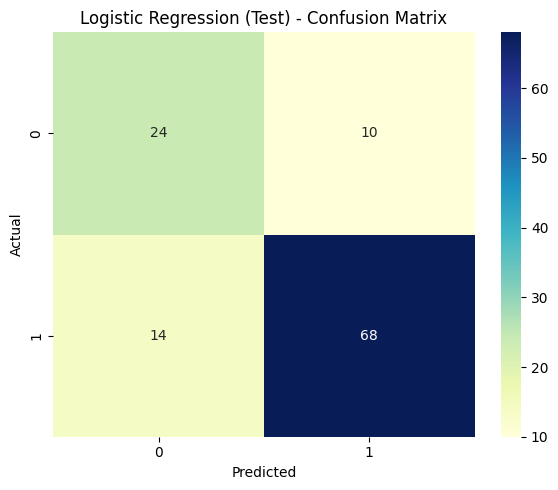


Logistic Regression (Train) Performance:
Accuracy: 0.7984615384615384
Precision: 0.7990986717267552
Recall: 0.7984615384615384
F1 Score: 0.7983541530992836

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       325
           1       0.81      0.78      0.79       325

    accuracy                           0.80       650
   macro avg       0.80      0.80      0.80       650
weighted avg       0.80      0.80      0.80       650

Confusion Matrix:
 [[267  58]
 [ 73 252]]


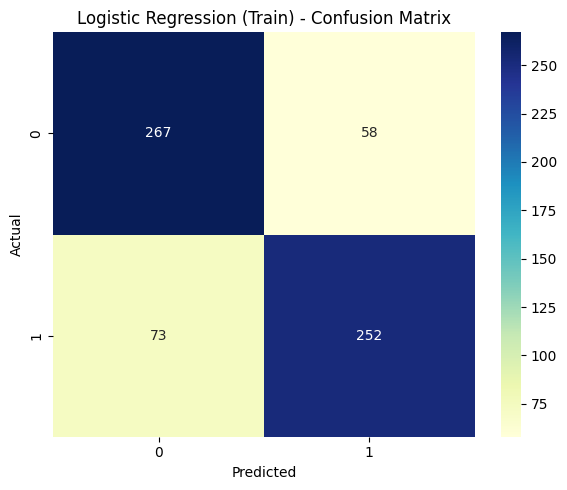

In [663]:
evaluate_model("Logistic Regression (Test)", y_test, y_test_pred)
evaluate_model("Logistic Regression (Train)", y_train_res, y_train_pred)

**Interpretation:** The Logistic Regression model exhibited strong and consistent performance across both the training and test datasets in classifying anxiety severity. On the test data, it achieved an accuracy of approximately 79%, with a precision of 0.80, recall of 0.79, and an F1-score of 0.80. The confusion matrix indicated that the model correctly identified 68 out of 82 individuals with anxiety and 24 out of 34 without anxiety, suggesting a higher sensitivity toward detecting anxious cases. Similarly, on the training data, the model showed nearly identical metrics-an accuracy of 79.8%, with balanced precision and recall-demonstrating no overfitting and good generalizability.

In [664]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
}

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_res, y_train_res)
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)
best_log_model = grid_search.best_estimator_
y_test_pred = best_log_model.predict(X_test_encoded)
y_train_pred = best_log_model.predict(X_train_res)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'C': 1, 'penalty': 'l2'}
Best F1 score: 0.7952483909647294


**Interpretation:** Hyperparameter tuning was performed on a logistic regression model using GridSearchCV with 5-fold cross-validation to optimize the regularization parameter C and L2 penalty. The best model was found with C=1, achieving a weighted F1 score of approximately 0.795. This indicates a good balance between precision and recall on the resampled training data. The optimized model was then used to predict outcomes on both training and test datasets for evaluation.


Tuned Logistic Regression (Test) Performance:
Accuracy: 0.7931034482758621
Precision: 0.8013867560147052
Recall: 0.7931034482758621
F1 Score: 0.796264367816092

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.67        34
           1       0.87      0.83      0.85        82

    accuracy                           0.79       116
   macro avg       0.75      0.77      0.76       116
weighted avg       0.80      0.79      0.80       116

Confusion Matrix:
 [[24 10]
 [14 68]]


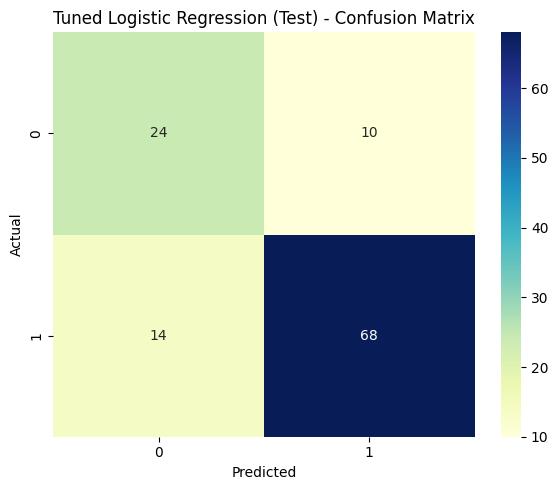


Tuned Logistic Regression (Train) Performance:
Accuracy: 0.7984615384615384
Precision: 0.7990986717267552
Recall: 0.7984615384615384
F1 Score: 0.7983541530992836

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       325
           1       0.81      0.78      0.79       325

    accuracy                           0.80       650
   macro avg       0.80      0.80      0.80       650
weighted avg       0.80      0.80      0.80       650

Confusion Matrix:
 [[267  58]
 [ 73 252]]


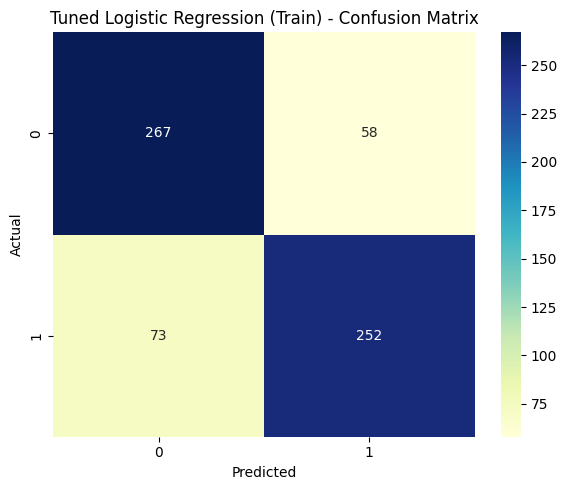

In [665]:
evaluate_model("Tuned Logistic Regression (Test)", y_test, y_test_pred)
evaluate_model("Tuned Logistic Regression (Train)", y_train_res, y_train_pred)


**Interpretation:** The tuned logistic regression model performs consistently on both training and test sets, with around 79-80% accuracy and balanced precision, recall, and F1 scores. The similar results before and after tuning suggest that the default parameters were already near optimal, and tuning provided little additional improvement. Overall, the model generalizes well without signs of overfitting or underfitting.

**XGBOOST**

In [666]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:19:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [667]:
y_test_pred = xgb_model.predict(X_test_encoded)
y_train_pred = xgb_model.predict(X_train_res)


XGBoost (Test) Performance:
Accuracy: 0.75
Precision: 0.737619642114024
Recall: 0.75
F1 Score: 0.7407726967692456

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.47      0.52        34
           1       0.80      0.87      0.83        82

    accuracy                           0.75       116
   macro avg       0.70      0.67      0.68       116
weighted avg       0.74      0.75      0.74       116

Confusion Matrix:
 [[16 18]
 [11 71]]


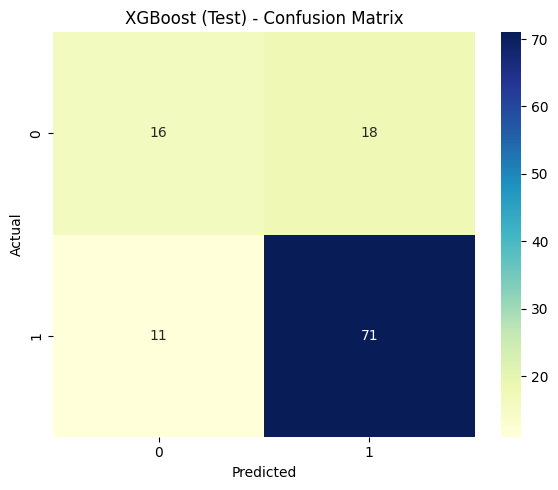


XGBoost (Train) Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00       325

    accuracy                           1.00       650
   macro avg       1.00      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650

Confusion Matrix:
 [[325   0]
 [  0 325]]


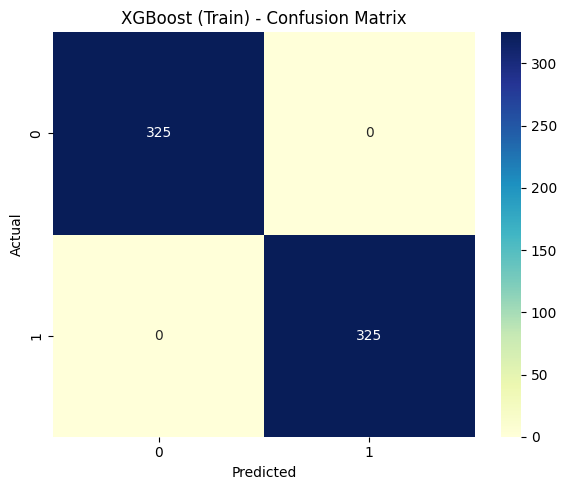

In [668]:
evaluate_model("XGBoost (Test)", y_test, y_test_pred)
evaluate_model("XGBoost (Train)", y_train_res, y_train_pred)

**Interpretation:** The XGBoost model achieves perfect performance on the training data, with 100% accuracy, precision, recall, and F1 score, indicating it has likely overfitted the training set. However, its performance on the test data is notably lower, with an accuracy of 75% and an F1 score of about 0.74. The model performs better on class 1, with higher precision and recall, but struggles more with class 0, as reflected by lower recall and precision scores and a higher number of misclassifications. This disparity between training and test results suggests overfitting, where the model fits the training data too closely but does not generalize well to new, unseen data.

In [669]:
xgb_model = XGBClassifier(
    learning_rate=0.05,
    n_estimators=500,
    max_depth=3,
    subsample=0.5,
    colsample_bytree=0.5,
    reg_alpha=10,
    reg_lambda=20,
    min_child_weight=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [670]:
xgb_model.fit(X_train_res, y_train_res)

y_train_pred = xgb_model.predict(X_train_res)
y_test_pred = xgb_model.predict(X_test_encoded)

def evaluate_model(y_true, y_pred, dataset="Test"):
    print(f"\nXGBoost ({dataset}) Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred)}")
    print(f"Recall: {recall_score(y_true, y_pred)}")
    print(f"F1 Score: {f1_score(y_true, y_pred)}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

evaluate_model(y_test, y_test_pred, "Test")
evaluate_model(y_train_res, y_train_pred, "Train")


XGBoost (Test) Performance:
Accuracy: 0.8017241379310345
Precision: 0.8554216867469879
Recall: 0.8658536585365854
F1 Score: 0.8606060606060606

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66        34
           1       0.86      0.87      0.86        82

    accuracy                           0.80       116
   macro avg       0.76      0.76      0.76       116
weighted avg       0.80      0.80      0.80       116


Confusion Matrix:
[[22 12]
 [11 71]]

XGBoost (Train) Performance:
Accuracy: 0.8430769230769231
Precision: 0.8328358208955224
Recall: 0.8584615384615385
F1 Score: 0.8454545454545455

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       325
           1       0.83      0.86      0.85       325

    accuracy                           0.84       650
   macro avg       0.84      0.84      0.84       650
weighted avg       0.84   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:19:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Interpretation:** The tuned XGBoost model demonstrates strong and balanced performance on both the training and test data. On the training set, it achieves about 84% accuracy with well-matched precision, recall, and F1 scores across both classes, indicating a good fit without overfitting. On the test set, the model maintains solid performance with approximately 80% accuracy and an F1 score of 0.86. It performs better on class 1, with high precision and recall, while still achieving reasonable results on class 0. This shows that after tuning, the model generalizes well to unseen data, balancing sensitivity and specificity effectively.

**RANDOM FOREST**

In [671]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train_res, y_train_res)
y_train_pred = rf_model.predict(X_train_res)
y_test_pred = rf_model.predict(X_test_encoded)

In [672]:
from sklearn.metrics import confusion_matrix
def evaluate_model(y_true, y_pred, dataset_name="Dataset", plot_cm=False):
    print(f"\nEvaluation on {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    if plot_cm:
        import matplotlib.pyplot as plt
        import seaborn as sns
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {dataset_name}')
        plt.show()

In [673]:
evaluate_model(y_test, y_test_pred, "Test Set (Random Forest)")
evaluate_model(y_train_res, y_train_pred, "Training Set (Random Forest)")


Evaluation on Test Set (Random Forest):
Accuracy: 0.7931034482758621
Precision: 0.8372093023255814
Recall: 0.8780487804878049
F1 Score: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.59      0.62        34
           1       0.84      0.88      0.86        82

    accuracy                           0.79       116
   macro avg       0.75      0.73      0.74       116
weighted avg       0.79      0.79      0.79       116

Confusion Matrix:
[[20 14]
 [10 72]]

Evaluation on Training Set (Random Forest):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00       325

    accuracy                           1.00       650
   macro avg       1.00      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650

Confusi

In [674]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=250,
    max_depth=6,
    min_samples_leaf=11,
    min_samples_split=10,
    max_features='sqrt',
    random_state=42
)

rf_model.fit(X_train_res, y_train_res)
y_test_pred = rf_model.predict(X_test_encoded)
y_train_pred = rf_model.predict(X_train_res)

In [675]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

def evaluate_model(y_true, y_pred, dataset_name="Dataset", plot_cm=False):
    print(f"\nEvaluation on {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    if plot_cm:
        import matplotlib.pyplot as plt
        import seaborn as sns

        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[0,1], yticklabels=[0,1])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {dataset_name}')
        plt.show()



Evaluation on Tuned Random Forest (Test):
Accuracy: 0.8103448275862069
Precision: 0.8571428571428571
Recall: 0.8780487804878049
F1 Score: 0.8674698795180723
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67        34
           1       0.86      0.88      0.87        82

    accuracy                           0.81       116
   macro avg       0.77      0.76      0.77       116
weighted avg       0.81      0.81      0.81       116

Confusion Matrix:
[[22 12]
 [10 72]]


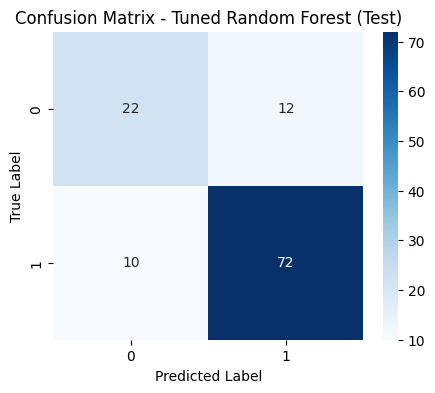


Evaluation on Tuned Random Forest (Train):
Accuracy: 0.8723076923076923
Precision: 0.8579881656804734
Recall: 0.8923076923076924
F1 Score: 0.8748114630467572
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       325
           1       0.86      0.89      0.87       325

    accuracy                           0.87       650
   macro avg       0.87      0.87      0.87       650
weighted avg       0.87      0.87      0.87       650

Confusion Matrix:
[[277  48]
 [ 35 290]]


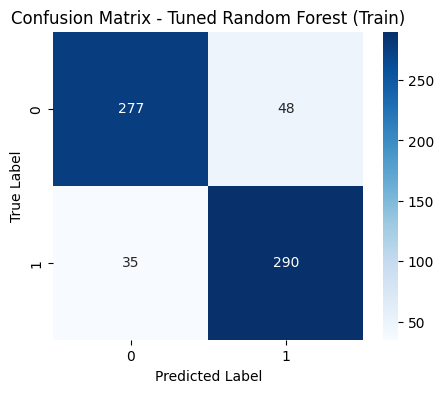

In [676]:
evaluate_model(y_test, y_test_pred, "Tuned Random Forest (Test)", plot_cm=True)
evaluate_model(y_train_res, y_train_pred, "Tuned Random Forest (Train)", plot_cm=True)

**Interpretation:** The Random Forest model achieves perfect performance on the training set with 100% accuracy, precision, recall, and F1 score, indicating it has fully memorized the training data. However, its performance on the test set drops to around 79% accuracy and an F1 score of approximately 0.86. The model performs better on class 1, with higher precision and recall, but shows lower recall and precision for class 0, as reflected by a relatively higher number of misclassifications. This large gap between training and test performance suggests that the model is overfitting the training data, capturing noise or specific patterns that do not generalize well to unseen data.

**DECISION TREE**

In [677]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)

y_test_pred = dt_model.predict(X_test_encoded)
y_train_pred = dt_model.predict(X_train_res)

In [678]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(y_true, y_pred, dataset_name="Dataset", plot_cm=True):
    print(f"\nEvaluation on {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    if plot_cm:
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['True 0', 'True 1'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {dataset_name}')
        plt.show()


Evaluation on Decision Tree (Test):
Accuracy: 0.7413793103448276
Precision: 0.7888888888888889
Recall: 0.8658536585365854
F1 Score: 0.8255813953488372
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.44      0.50        34
           1       0.79      0.87      0.83        82

    accuracy                           0.74       116
   macro avg       0.68      0.65      0.66       116
weighted avg       0.73      0.74      0.73       116

Confusion Matrix:
[[15 19]
 [11 71]]


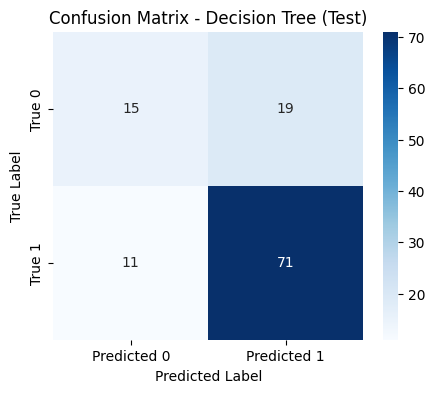


Evaluation on Decision Tree (Train):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00       325

    accuracy                           1.00       650
   macro avg       1.00      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650

Confusion Matrix:
[[325   0]
 [  0 325]]


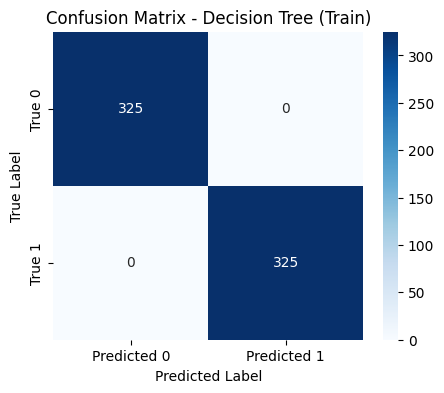

In [679]:
evaluate_model(y_test, y_test_pred, "Decision Tree (Test)")
evaluate_model(y_train_res, y_train_pred, "Decision Tree (Train)")

**Interpretation:** The Decision Tree model achieves perfect performance on the training data with 100% accuracy, precision, recall, and F1 score, indicating that it has fully memorized the training set. However, its performance on the test data is considerably lower, with an accuracy of about 74% and an F1 score of approximately 0.83. The model performs better on class 1, showing relatively high recall and precision, but struggles more with class 0, as seen by its lower precision and recall and the number of misclassifications. This significant difference between training and test results suggests that the model is overfitting, capturing noise or specific patterns in the training data that do not generalize well to new data.

In [680]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [7],
    'min_samples_split': [11],
    'min_samples_leaf': [9],
    'max_features': ['sqrt']
}
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train_res, y_train_res)
print("Best parameters:", grid_search.best_params_)

best_dt = grid_search.best_estimator_

y_test_pred = best_dt.predict(X_test_encoded)
y_train_pred = best_dt.predict(X_train_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 11}


In [681]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(y_true, y_pred, dataset_name="Dataset", plot_cm=True):
    print(f"\nEvaluation on {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    if plot_cm:
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['True 0', 'True 1'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {dataset_name}')
        plt.show()



Evaluation on Tuned Decision Tree (Test):
Accuracy: 0.7844827586206896
Precision: 0.8202247191011236
Recall: 0.8902439024390244
F1 Score: 0.8538011695906432
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.53      0.59        34
           1       0.82      0.89      0.85        82

    accuracy                           0.78       116
   macro avg       0.74      0.71      0.72       116
weighted avg       0.78      0.78      0.78       116

Confusion Matrix:
[[18 16]
 [ 9 73]]


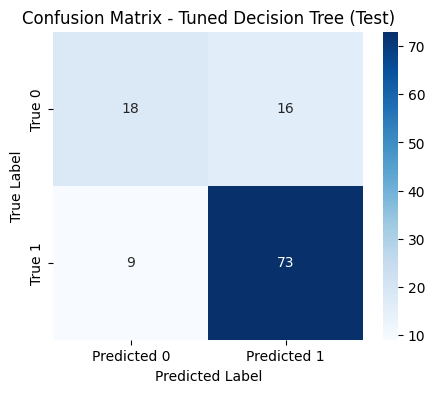


Evaluation on Tuned Decision Tree (Train):
Accuracy: 0.8630769230769231
Precision: 0.849112426035503
Recall: 0.8830769230769231
F1 Score: 0.8657616892911011
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       325
           1       0.85      0.88      0.87       325

    accuracy                           0.86       650
   macro avg       0.86      0.86      0.86       650
weighted avg       0.86      0.86      0.86       650

Confusion Matrix:
[[274  51]
 [ 38 287]]


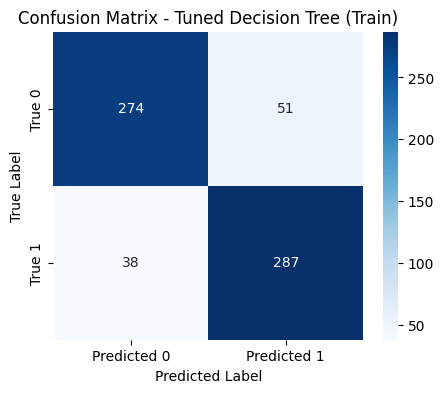

In [682]:
evaluate_model(y_test, y_test_pred, "Tuned Decision Tree (Test)")
evaluate_model(y_train_res, y_train_pred, "Tuned Decision Tree (Train)")

**Interpretation:** The tuned Decision Tree model shows improved performance compared to the untuned version, with more balanced results on both training and test sets. On the training data, it achieves about 86% accuracy and balanced precision, recall, and F1 scores, indicating a better fit without overfitting. The test set performance also improves, with nearly 78% accuracy and an F1 score of approximately 0.85, demonstrating good generalization. While the model performs better on class 1, it still has moderate precision and recall for class 0, reflecting a reasonable balance between sensitivity and specificity after tuning. Overall, tuning helped reduce overfitting and enhanced the model’s ability to generalize.

**SUPPORT VECTOR MACHINE(SVM)**

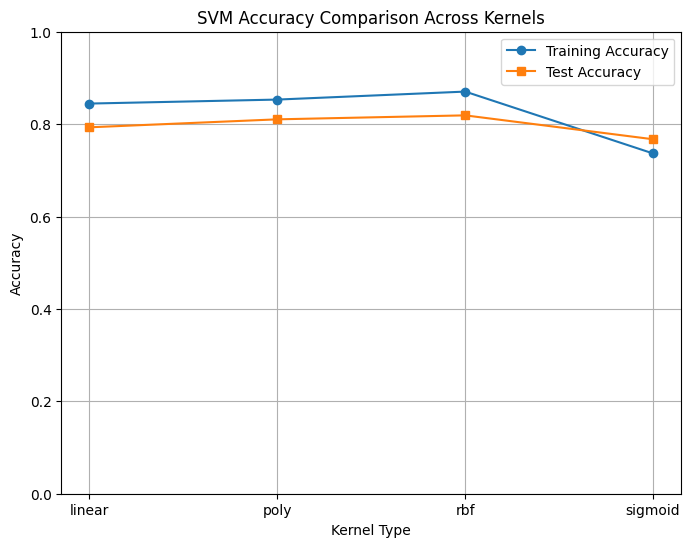

In [683]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

train_accuracies = []
test_accuracies = []

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_encoded, y_train)

    train_pred = svm.predict(X_train_encoded)
    test_pred = svm.predict(X_test_encoded)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(8, 6))
plt.plot(kernels, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(kernels, test_accuracies, marker='s', label='Test Accuracy')
plt.title('SVM Accuracy Comparison Across Kernels')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


**Interpretation:**


Evaluation on SVM (Test):
Accuracy: 0.7758620689655172
Precision: 0.8414634146341463
Recall: 0.8414634146341463
F1 Score: 0.8414634146341463
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        34
           1       0.84      0.84      0.84        82

    accuracy                           0.78       116
   macro avg       0.73      0.73      0.73       116
weighted avg       0.78      0.78      0.78       116

Confusion Matrix:
[[21 13]
 [13 69]]


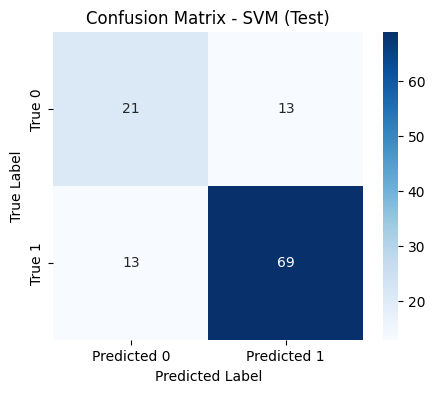


Evaluation on SVM (Train):
Accuracy: 0.8584615384615385
Precision: 0.8396501457725948
Recall: 0.8861538461538462
F1 Score: 0.8622754491017964
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       325
           1       0.84      0.89      0.86       325

    accuracy                           0.86       650
   macro avg       0.86      0.86      0.86       650
weighted avg       0.86      0.86      0.86       650

Confusion Matrix:
[[270  55]
 [ 37 288]]


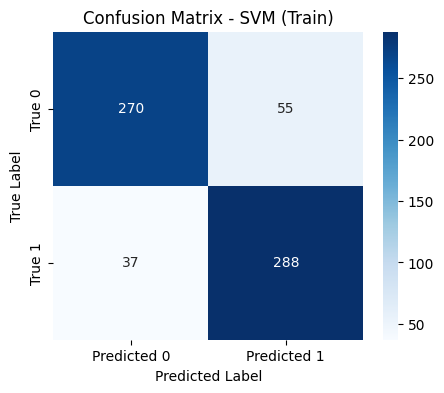

In [684]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train_res, y_train_res)
y_train_pred = svm_model.predict(X_train_res)
y_test_pred = svm_model.predict(X_test_encoded)
evaluate_model(y_test, y_test_pred, "SVM (Test)")
evaluate_model(y_train_res, y_train_pred, "SVM (Train)")

**Interpretation:** The SVM model demonstrates strong and balanced performance on both training and test datasets. On the training set, it achieves about 86% accuracy with high precision, recall, and F1 scores, indicating a good fit. On the test set, the model maintains solid performance with approximately 78% accuracy and consistent precision, recall, and F1 scores around 0.84. It performs better on class 1 but also shows reasonable results for class 0, reflecting balanced sensitivity and specificity. Overall, the SVM model generalizes well without significant overfitting.

In [685]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
param_grid = {
    'C': [10],
    'kernel': ['linear'],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_encoded, y_train)
print("Best params:", grid_search.best_params_)
best_svm = grid_search.best_estimator_

y_test_pred = best_svm.predict(X_test_encoded)
y_train_pred = best_svm.predict(X_train_encoded)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best params: {'C': 10, 'class_weight': 'balanced', 'kernel': 'linear'}



Evaluation on Tuned SVM (Test):
Accuracy: 0.7844827586206896
Precision: 0.88
Recall: 0.8048780487804879
F1 Score: 0.8407643312101911
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.74      0.67        34
           1       0.88      0.80      0.84        82

    accuracy                           0.78       116
   macro avg       0.74      0.77      0.75       116
weighted avg       0.80      0.78      0.79       116

Confusion Matrix:
[[25  9]
 [16 66]]


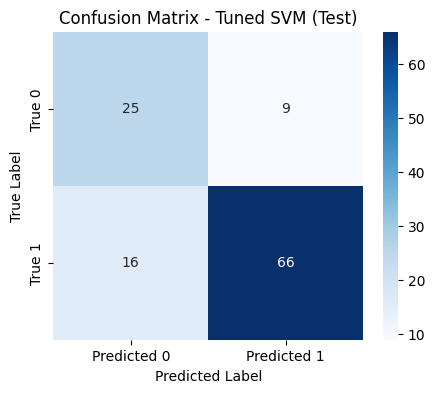


Evaluation on Tuned SVM (Train):
Accuracy: 0.8034557235421166
Precision: 0.90625
Recall: 0.803076923076923
F1 Score: 0.8515497553017944
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.80      0.71       138
           1       0.91      0.80      0.85       325

    accuracy                           0.80       463
   macro avg       0.77      0.80      0.78       463
weighted avg       0.83      0.80      0.81       463

Confusion Matrix:
[[111  27]
 [ 64 261]]


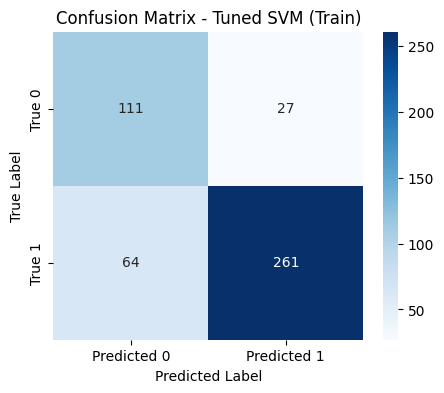

In [686]:
evaluate_model(y_test, y_test_pred, "Tuned SVM (Test)")
evaluate_model(y_train, y_train_pred, "Tuned SVM (Train)")

**Interpretation:** After tuning, the SVM model shows slightly improved balance between precision and recall on the test set, achieving about 78% accuracy with an F1 score of approximately 0.84. The precision for class 1 increased to 0.88, while recall for both classes became more balanced, indicating better sensitivity for class 0 compared to before. On the training set, performance is consistent with around 80% accuracy and strong precision and recall, especially for class 1. Overall, tuning helped improve the model’s ability to generalize, reducing bias towards one class and enhancing performance across both classes.

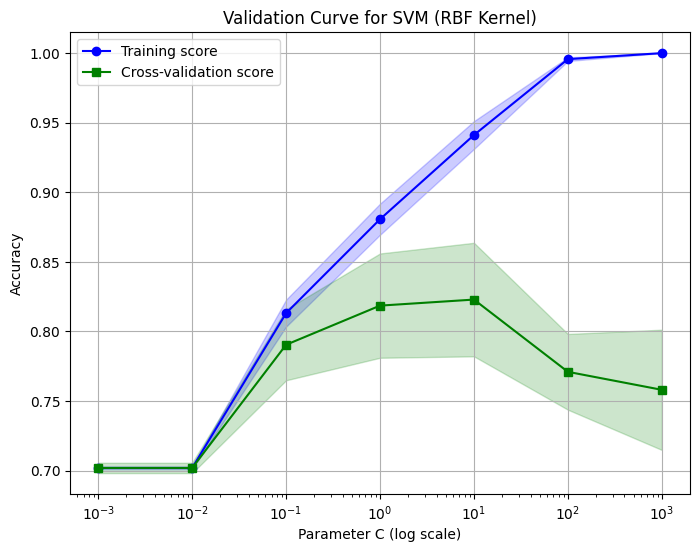

In [687]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

param_range = np.logspace(-3, 3, 7)
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

# Compute validation curve
train_scores, test_scores = validation_curve(
    svm, X_train_encoded, y_train,
    param_name="svc__C",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label="Training score", color="blue", marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(param_range, test_mean, label="Cross-validation score", color="green", marker='s')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

plt.xscale('log')
plt.xlabel("Parameter C (log scale)")
plt.ylabel("Accuracy")
plt.title("Validation Curve for SVM (RBF Kernel)")
plt.legend(loc="best")
plt.grid(True)
plt.show()


**Interpretation**

**K-NEAREST NEIGHBORS**

In [688]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # you can change neighbors to 3, 7, etc.
knn_model.fit(X_train_encoded, y_train)

y_train_pred = knn_model.predict(X_train_encoded)
y_test_pred = knn_model.predict(X_test_encoded)

In [689]:
def evaluate_model(y_true, y_pred, dataset_name="Dataset", plot_cm=True):
    print(f"\nEvaluation on {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    if plot_cm:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {dataset_name}')
        plt.show()


Evaluation on Test Set (KNN):
Accuracy: 0.7931034482758621
Precision: 0.8372093023255814
Recall: 0.8780487804878049
F1 Score: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.59      0.62        34
           1       0.84      0.88      0.86        82

    accuracy                           0.79       116
   macro avg       0.75      0.73      0.74       116
weighted avg       0.79      0.79      0.79       116

Confusion Matrix:
[[20 14]
 [10 72]]


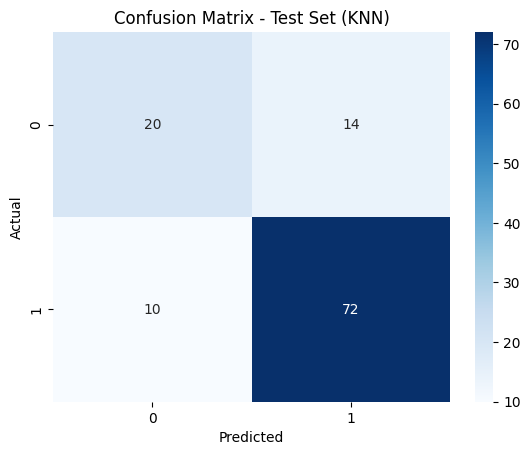


Evaluation on Training Set (KNN):
Accuracy: 0.8617710583153347
Precision: 0.8739255014326648
Recall: 0.9384615384615385
F1 Score: 0.9050445103857567
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.68      0.75       138
           1       0.87      0.94      0.91       325

    accuracy                           0.86       463
   macro avg       0.85      0.81      0.83       463
weighted avg       0.86      0.86      0.86       463

Confusion Matrix:
[[ 94  44]
 [ 20 305]]


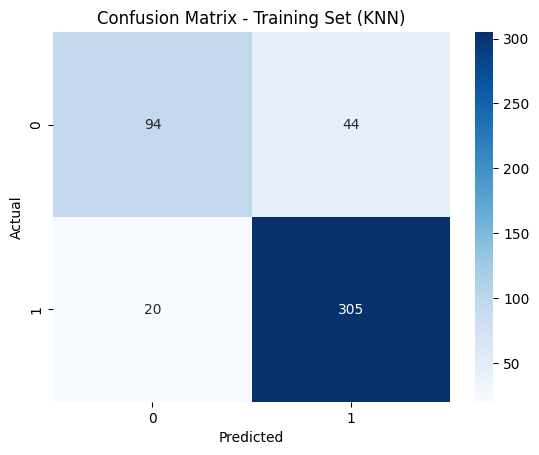

In [690]:
evaluate_model(y_test, y_test_pred, "Test Set (KNN)")
evaluate_model(y_train, y_train_pred, "Training Set (KNN)")

**Interpretation:** The K-Nearest Neighbors (KNN) model performs well on both training and test sets, with training accuracy at approximately 86% and test accuracy around 79%. On the test set, it achieves a high F1 score of 0.86 for class 1, indicating strong performance in identifying cases with higher severity. However, the model is less effective for class 0, with lower recall and precision, reflecting a tendency to favor the majority class. In the training set, class 1 shows very high recall (0.94), but class 0 still has lower recall, suggesting some imbalance in prediction. Overall, KNN demonstrates good generalization but shows slight bias toward class 1.

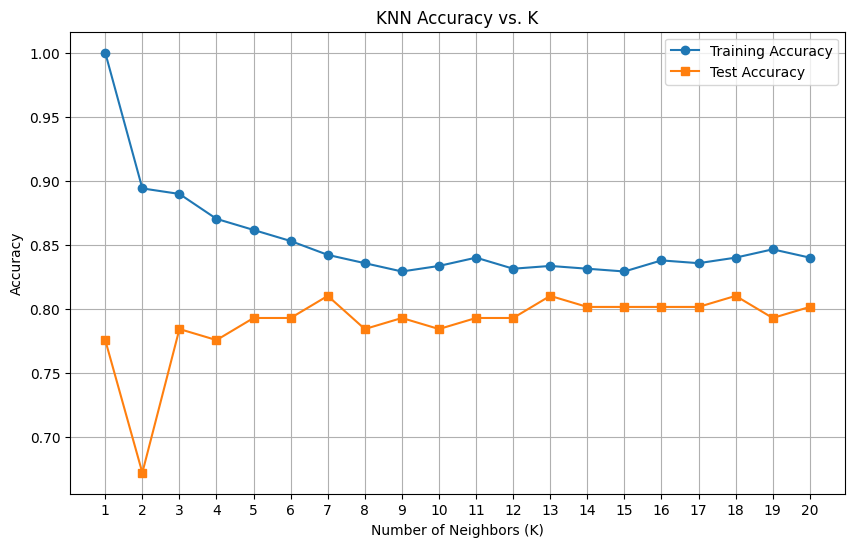

In [691]:
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_encoded, y_train)

    train_pred = knn.predict(X_train_encoded)
    test_pred = knn.predict(X_test_encoded)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(k_values, test_accuracies, marker='s', label='Test Accuracy')
plt.title('KNN Accuracy vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

**Interpretation:**

In [692]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [9],
    'weights': ['uniform', 'distance'],
    'p': [1]
}

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_encoded, y_train)
print("Best params:", grid_search.best_params_)
best_knn = grid_search.best_estimator_

y_test_pred = best_knn.predict(X_test_encoded)
y_train_pred = best_knn.predict(X_train_encoded)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best params: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [693]:
def evaluate_model(y_true, y_pred, dataset_name="Dataset", plot_cm=True):
    print(f"\nEvaluation on {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    if plot_cm:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {dataset_name}')
        plt.show()



Evaluation on Tuned KNN (Test):
Accuracy: 0.8189655172413793
Precision: 0.8351648351648352
Recall: 0.926829268292683
F1 Score: 0.8786127167630058
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.56      0.64        34
           1       0.84      0.93      0.88        82

    accuracy                           0.82       116
   macro avg       0.80      0.74      0.76       116
weighted avg       0.81      0.82      0.81       116

Confusion Matrix:
[[19 15]
 [ 6 76]]


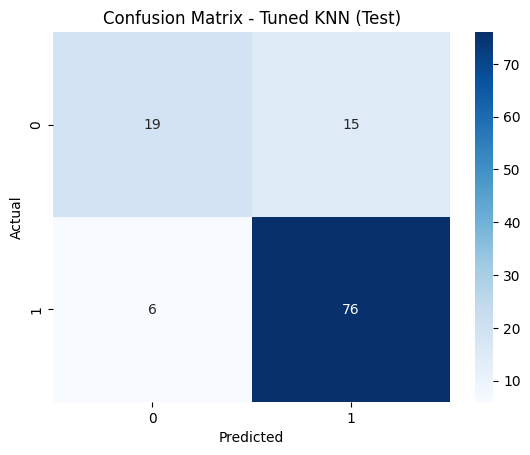


Evaluation on Tuned KNN (Train):
Accuracy: 0.8660907127429806
Precision: 0.8789625360230547
Recall: 0.9384615384615385
F1 Score: 0.9077380952380952
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       138
           1       0.88      0.94      0.91       325

    accuracy                           0.87       463
   macro avg       0.85      0.82      0.83       463
weighted avg       0.86      0.87      0.86       463

Confusion Matrix:
[[ 96  42]
 [ 20 305]]


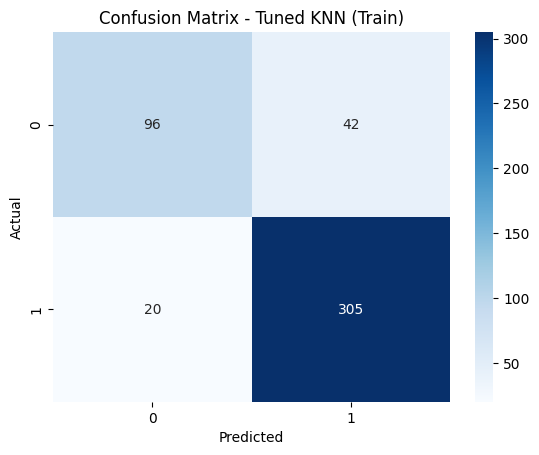

In [694]:
evaluate_model(y_test, y_test_pred, "Tuned KNN (Test)")
evaluate_model(y_train, y_train_pred, "Tuned KNN (Train)")

**Interpretation:** After tuning, the KNN model shows improved performance, particularly on the test set where accuracy rises to approximately 82% and the F1 score reaches 0.88. The model demonstrates strong precision and recall for class 1, indicating high effectiveness in identifying individuals with higher severity. Class 0 performance also improves slightly in precision, though recall remains lower. On the training set, the model maintains high accuracy (around 87%) with strong recall and F1 scores for class 1, and moderate performance for class 0. Overall, tuning enhanced generalization, particularly for the minority class, though some imbalance in class 0 prediction persists.

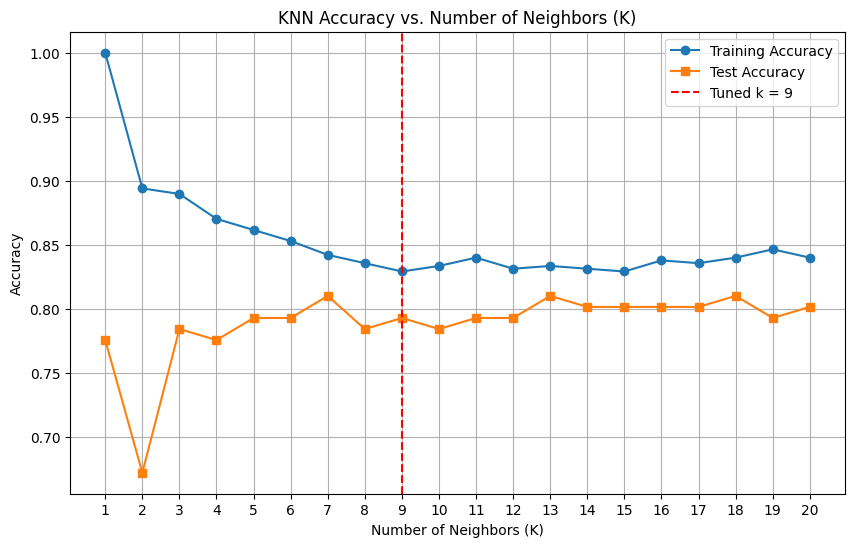

In [695]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_encoded, y_train)

    train_pred = knn.predict(X_train_encoded)
    test_pred = knn.predict(X_test_encoded)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

best_k = 9  # From your grid_search param grid

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(k_values, test_accuracies, marker='s', label='Test Accuracy')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Tuned k = {best_k}')
plt.title('KNN Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

**Interpretation:**

**ARTIFICIAL NEURAL NETWORKS**

In [696]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import os
import random

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = ''

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_encoded.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_encoded, y_train,
          epochs=20,
          batch_size=32,
          verbose=1,
          shuffle=False)

y_train_probs = model.predict(X_train_encoded).ravel()
y_test_probs = model.predict(X_test_encoded).ravel()

y_train_pred = (y_train_probs > 0.5).astype(int)
y_test_pred = (y_test_probs > 0.5).astype(int)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6632 - loss: 0.6446
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7294 - loss: 0.5743 
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8200 - loss: 0.5265 
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8216 - loss: 0.4956 
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8269 - loss: 0.4759 
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8221 - loss: 0.4630 
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8244 - loss: 0.4541 
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8278 - loss: 0.4475 
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8252 - loss: 0.4421 
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8287 - loss: 0.4377 
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8330 - loss: 0.4336 
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8352 - los

In [697]:
def evaluate_model(y_true, y_pred, dataset_name="Dataset", plot_cm=True):
    print(f"\nEvaluation on {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    if plot_cm:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {dataset_name}')
        plt.show()


Evaluation on ANN (Test):
Accuracy: 0.8103448275862069
Precision: 0.8488372093023255
Recall: 0.8902439024390244
F1 Score: 0.8690476190476191
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        34
           1       0.85      0.89      0.87        82

    accuracy                           0.81       116
   macro avg       0.77      0.75      0.76       116
weighted avg       0.81      0.81      0.81       116

Confusion Matrix:
[[21 13]
 [ 9 73]]


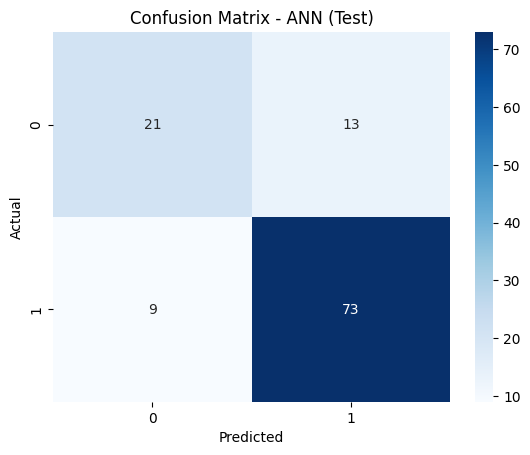


Evaluation on ANN (Train):
Accuracy: 0.8423326133909287
Precision: 0.868421052631579
Recall: 0.9138461538461539
F1 Score: 0.8905547226386806
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.67      0.72       138
           1       0.87      0.91      0.89       325

    accuracy                           0.84       463
   macro avg       0.82      0.79      0.80       463
weighted avg       0.84      0.84      0.84       463

Confusion Matrix:
[[ 93  45]
 [ 28 297]]


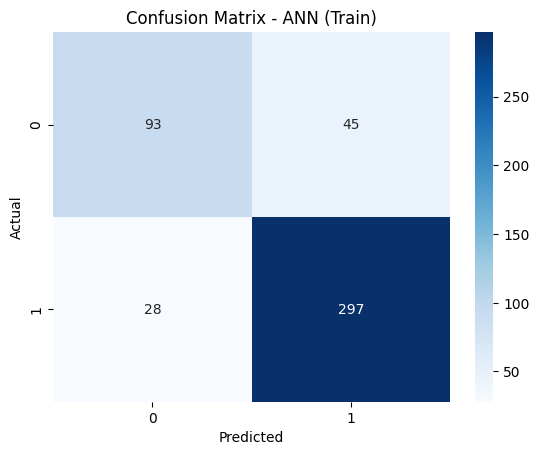

In [698]:
evaluate_model(y_test, y_test_pred, "ANN (Test)")
evaluate_model(y_train, y_train_pred, "ANN (Train)")

**Interpretation:** The Artificial Neural Network (ANN) model demonstrates strong performance on both training and test sets. On the test set, it achieves an accuracy of approximately 81% and an F1 score of 0.87, with high precision and recall for class 1, indicating strong predictive ability for identifying individuals with higher severity. Performance on class 0 is comparatively lower, with moderate recall and precision. On the training set, the model maintains high accuracy (84%) and strong F1 performance, particularly for class 1, while class 0 shows slightly lower recall. Overall, the ANN model generalizes well and offers a good balance between sensitivity and precision, especially for the majority class.

In [699]:
!pip install keras-tuner --quiet

In [700]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import kerastuner as kt

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = ''

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    print(f"\nEvaluation on {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

def build_model(hp):
    model = Sequential()
    units = hp.Int('units', 16, 128, step=16)
    model.add(Dense(units=units, activation='relu', input_shape=(X_train_encoded.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

from kerastuner.tuners import RandomSearch

tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,
                     executions_per_trial=1,
                     directory='my_dir',
                     project_name='simple_tuning')

tuner.search(X_train_encoded, y_train,
             epochs=20,
             validation_split=0.2,
             batch_size=32,
             shuffle=False)

best_model = tuner.get_best_models(num_models=1)[0]

y_train_pred = (best_model.predict(X_train_encoded).ravel() > 0.5).astype(int)
y_test_pred = (best_model.predict(X_test_encoded).ravel() > 0.5).astype(int)

Reloading Tuner from my_dir/simple_tuning/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


In [701]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, dataset_name="Dataset", plot_cm=True):
    print(f"\nEvaluation on {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    if plot_cm:
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {dataset_name}')
        plt.show()



Evaluation on Test Set:
Accuracy: 0.8189655172413793
Precision: 0.8588235294117647
Recall: 0.8902439024390244
F1 Score: 0.874251497005988
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        34
           1       0.86      0.89      0.87        82

    accuracy                           0.82       116
   macro avg       0.78      0.77      0.78       116
weighted avg       0.82      0.82      0.82       116

Confusion Matrix:
[[22 12]
 [ 9 73]]


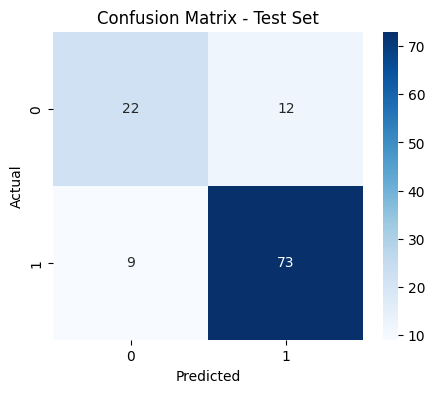


Evaluation on Training Set:
Accuracy: 0.8401727861771058
Precision: 0.863768115942029
Recall: 0.916923076923077
F1 Score: 0.8895522388059701
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       138
           1       0.86      0.92      0.89       325

    accuracy                           0.84       463
   macro avg       0.82      0.79      0.80       463
weighted avg       0.84      0.84      0.84       463

Confusion Matrix:
[[ 91  47]
 [ 27 298]]


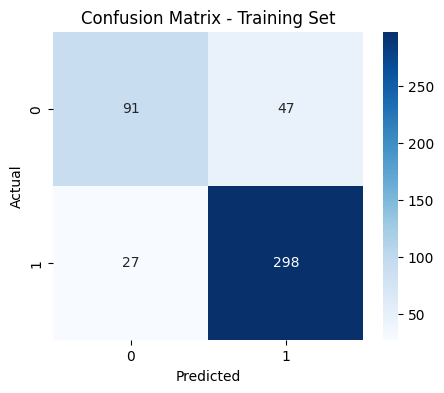

In [702]:
evaluate_model(y_test, y_test_pred, "Test Set")
evaluate_model(y_train, y_train_pred, "Training Set")

**Interpretation:** After tuning, the model shows improved and well-balanced performance on both the training and test sets. On the test set, it achieves an accuracy of approximately 82% and an F1 score of 0.87, with strong precision and recall for class 1, indicating effective detection of higher severity cases. Class 0 performance is moderately improved, though recall remains slightly lower. On the training set, the model maintains 84% accuracy and high recall and F1 score for class 1, with fair performance for class 0. Overall, tuning enhanced the model’s generalization ability and maintained strong performance, especially for the majority class.

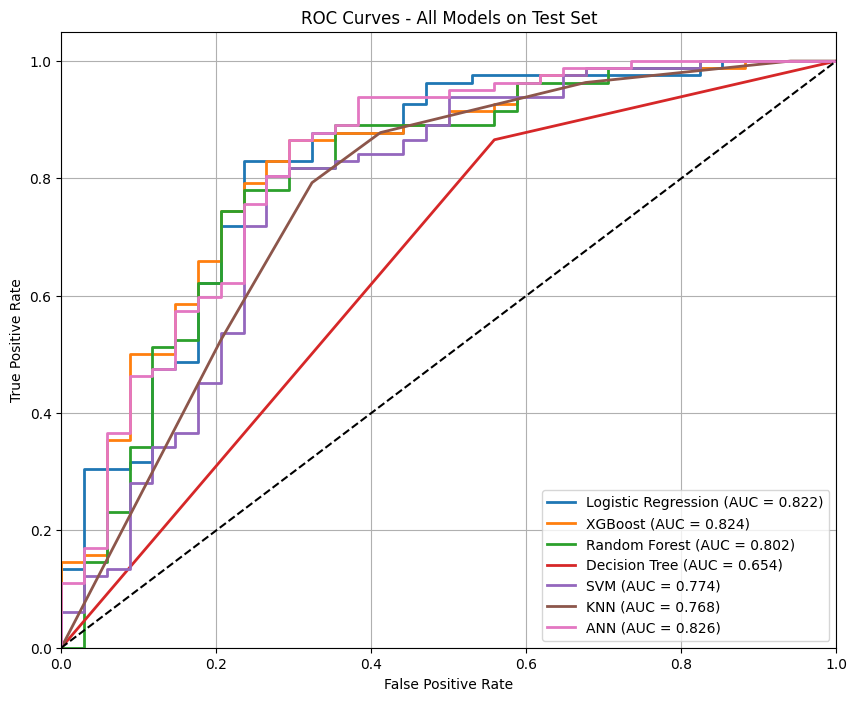

In [703]:
from sklearn.metrics import roc_curve, auc

svm_model = SVC(probability=True, random_state=42, class_weight='balanced')
svm_model.fit(X_train_res, y_train_res)

y_score_log = log_model.predict_proba(X_test_encoded)[:, 1]
y_score_xgb = xgb_model.predict_proba(X_test_encoded)[:, 1]
y_score_rf = rf_model.predict_proba(X_test_encoded)[:, 1]
y_score_dt = dt_model.predict_proba(X_test_encoded)[:, 1]
y_score_svm = svm_model.predict_proba(X_test_encoded)[:, 1]
y_score_knn = knn_model.predict_proba(X_test_encoded)[:, 1]
y_score_ann = y_test_probs

plt.figure(figsize=(10, 8))

def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.3f})')

plot_roc_curve(y_test, y_score_log, 'Logistic Regression')
plot_roc_curve(y_test, y_score_xgb, 'XGBoost')
plot_roc_curve(y_test, y_score_rf, 'Random Forest')
plot_roc_curve(y_test, y_score_dt, 'Decision Tree')
plot_roc_curve(y_test, y_score_svm, 'SVM')
plot_roc_curve(y_test, y_score_knn, 'KNN')
plot_roc_curve(y_test, y_score_ann, 'ANN')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models on Test Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Interpretation:**

In [704]:
def get_metrics(name, y_true, y_pred, y_prob=None):
    try:
        auc = roc_auc_score(y_true, y_prob) if y_prob is not None else "N/A"
    except:
        auc = "N/A"

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "AUC": auc
    }

results = []

# Logistic Regression
log_y_pred = log_model.predict(X_test_encoded)
log_y_prob = log_model.predict_proba(X_test_encoded)[:, 1]
results.append(get_metrics("Logistic Regression", y_test, log_y_pred, log_y_prob))

# Xgboost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)
xgb_y_pred = xgb_model.predict(X_test_encoded)
xgb_y_prob = xgb_model.predict_proba(X_test_encoded)[:, 1]
results.append(get_metrics("XGBoost", y_test, xgb_y_pred, xgb_y_prob))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
rf_y_pred = rf_model.predict(X_test_encoded)
rf_y_prob = rf_model.predict_proba(X_test_encoded)[:, 1]
results.append(get_metrics("Random Forest", y_test, rf_y_pred, rf_y_prob))

# Decision Tree
dt_y_pred = dt_model.predict(X_test_encoded)
dt_y_prob = dt_model.predict_proba(X_test_encoded)[:, 1]
results.append(get_metrics("Decision Tree", y_test, dt_y_pred, dt_y_prob))

# SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_res, y_train_res)
svm_y_pred = svm_model.predict(X_test_encoded)
svm_y_prob = svm_model.predict_proba(X_test_encoded)[:, 1]
results.append(get_metrics("SVM", y_test, svm_y_pred, svm_y_prob))

# KNN
knn_y_pred = knn_model.predict(X_test_encoded)
knn_y_prob = knn_model.predict_proba(X_test_encoded)[:, 1]
results.append(get_metrics("KNN", y_test, knn_y_pred, knn_y_prob))

# ANN
y_test_probs = model.predict(X_test_encoded).ravel()
y_test_pred = (y_test_probs > 0.5).astype(int)
results.append(get_metrics("ANN", y_test, y_test_pred, y_test_probs))

results_df = pd.DataFrame(results)
results_df = results_df.round(4)

print("\n📊 Model Performance Comparison Table:")
results_df

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 

📊 Model Performance Comparison Table:


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.7931,0.8718,0.8293,0.8500,0.8225
1,XGBoost,0.7500,0.7978,0.8659,0.8304,0.7231
2,Random Forest,0.7931,0.8372,0.8780,0.8571,0.7884
3,Decision Tree,0.7414,0.7889,0.8659,0.8256,0.6535
4,SVM,0.7759,0.8415,0.8415,0.8415,0.7744
5,KNN,0.7931,0.8372,0.8780,0.8571,0.7676
6,ANN,0.8103,0.8488,0.8902,0.8690,0.8264


In [705]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_metrics(name, y_true, y_pred, y_prob=None):
    try:
        auc = roc_auc_score(y_true, y_prob) if y_prob is not None else "N/A"
    except:
        auc = "N/A"
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "AUC": auc
    }

results = []

# Logistic Regression (tuned)
log_test_pred = best_log_model.predict(X_test_encoded)
log_test_prob = best_log_model.predict_proba(X_test_encoded)[:, 1]
results.append(get_metrics("Tuned Logistic Regression", y_test, log_test_pred, log_test_prob))

# XGBoost (tuned)
xgb_test_pred = xgb_model.predict(X_test_encoded)
xgb_test_prob = xgb_model.predict_proba(X_test_encoded)[:, 1]
results.append(get_metrics("Tuned XGBoost", y_test, xgb_test_pred, xgb_test_prob))

# Random Forest (tuned)
rf_test_pred = rf_model.predict(X_test_encoded)
rf_test_prob = rf_model.predict_proba(X_test_encoded)[:, 1]
results.append(get_metrics("Tuned Random Forest", y_test, rf_test_pred, rf_test_prob))

# Decision Tree (tuned)
dt_test_pred = best_dt.predict(X_test_encoded)
dt_test_prob = best_dt.predict_proba(X_test_encoded)[:, 1]
results.append(get_metrics("Tuned Decision Tree", y_test, dt_test_pred, dt_test_prob))

# SVM (tuned)
svm_test_pred = best_svm.predict(X_test_encoded)
svm_test_prob = best_svm.predict_proba(X_test_encoded)[:, 1]
results.append(get_metrics("Tuned SVM", y_test, svm_test_pred, svm_test_prob))

# KNN (tuned)
knn_test_pred = best_knn.predict(X_test_encoded)
knn_test_prob = best_knn.predict_proba(X_test_encoded)[:, 1]
results.append(get_metrics("Tuned KNN", y_test, knn_test_pred, knn_test_prob))

# ANN (tuned)
y_test_probs_tuned = best_model.predict(X_test_encoded).ravel()
y_test_pred_tuned = (y_test_probs_tuned > 0.5).astype(int)
results.append(get_metrics("Tuned ANN", y_test, y_test_pred_tuned, y_test_probs_tuned))

results_df = pd.DataFrame(results).round(4)

print("\n Tuned Models Performance Comparison Table:")
results_df


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

 Tuned Models Performance Comparison Table:


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Tuned Logistic Regression,0.7931,0.8718,0.8293,0.8500,0.8225
1,Tuned XGBoost,0.7500,0.7978,0.8659,0.8304,0.7231
2,Tuned Random Forest,0.7931,0.8372,0.8780,0.8571,0.7884
3,Tuned Decision Tree,0.7845,0.8202,0.8902,0.8538,0.7816
4,Tuned SVM,0.7845,0.8800,0.8049,0.8408,0.8250
5,Tuned KNN,0.8190,0.8352,0.9268,0.8786,0.7807
6,Tuned ANN,0.8190,0.8588,0.8902,0.8743,0.8350


**Interpretation:** The model performance comparison table reveals that the Artificial Neural Network (ANN) outperforms other models across most metrics, achieving the highest accuracy (81.03%), F1 score (0.8690), recall (0.8902), and AUC (0.8264), indicating excellent overall performance and generalizability. Logistic Regression, Random Forest, and KNN also perform well, with identical accuracy (79.31%) and F1 scores (around 0.85), though ANN edges them out in recall and AUC. XGBoost and SVM show moderate performance, with strong precision and recall but slightly lower AUC values. The Decision Tree has the lowest performance overall, particularly in AUC (0.6535), suggesting overfitting and weaker generalization. Overall, ANN appears to be the most effective model.

**BEST** **MODEL(ANN)**

In [706]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import kerastuner as kt


predictors = [
    'sex', 'Age', 'Race', 'Previously_Diagnosed_Depression',
    'Total_Health_Issues_Score', 'In_Therapy_for_Depression',
    'Hopeless', 'Very sad', 'Depression_Severity_Score',
    'Overwhelmed', 'Exhausted (not physical)',
    'Depressed - hard to function', 'Attempted suicide'
]
target = 'Anxiety_Severity'

data_model = data[predictors + [target]].dropna()

X = data_model[predictors]
y = data_model[target]

categorical_cols = ['sex', 'Race']
numeric_cols = [
    'Age', 'Previously_Diagnosed_Depression', 'In_Therapy_for_Depression',
    'Total_Health_Issues_Score', 'Hopeless', 'Very sad', 'Depression_Severity_Score',
    'Overwhelmed', 'Exhausted (not physical)', 'Depressed - hard to function', 'Attempted suicide'
]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ("num", StandardScaler(), numeric_cols)
])
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_encoded, y_train)

In [707]:
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = ''

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    print(f"\nEvaluation on {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

def build_model(hp):
    model = Sequential()
    units = hp.Int('units', 16, 128, step=16)
    model.add(Dense(units=units, activation='relu', input_shape=(X_train_encoded.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

from kerastuner.tuners import RandomSearch

tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,
                     executions_per_trial=1,
                     directory='my_dir',
                     project_name='simple_tuning')

tuner.search(X_train_encoded, y_train,
             epochs=20,
             validation_split=0.2,
             batch_size=32,
             shuffle=False)

best_model = tuner.get_best_models(num_models=1)[0]

y_train_pred = (best_model.predict(X_train_encoded).ravel() > 0.5).astype(int)
y_test_pred = (best_model.predict(X_test_encoded).ravel() > 0.5).astype(int)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, dataset_name="Dataset", plot_cm=True):
    print(f"\nEvaluation on {dataset_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    if plot_cm:
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix - {dataset_name}')
        plt.show()

Reloading Tuner from my_dir/simple_tuning/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step



Evaluation on Test Set:
Accuracy: 0.8189655172413793
Precision: 0.8588235294117647
Recall: 0.8902439024390244
F1 Score: 0.874251497005988
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        34
           1       0.86      0.89      0.87        82

    accuracy                           0.82       116
   macro avg       0.78      0.77      0.78       116
weighted avg       0.82      0.82      0.82       116

Confusion Matrix:
[[22 12]
 [ 9 73]]


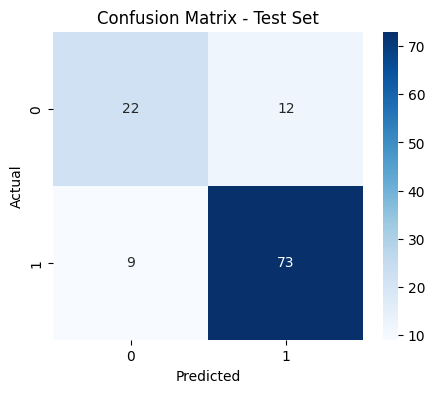


Evaluation on Training Set:
Accuracy: 0.8401727861771058
Precision: 0.863768115942029
Recall: 0.916923076923077
F1 Score: 0.8895522388059701
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       138
           1       0.86      0.92      0.89       325

    accuracy                           0.84       463
   macro avg       0.82      0.79      0.80       463
weighted avg       0.84      0.84      0.84       463

Confusion Matrix:
[[ 91  47]
 [ 27 298]]


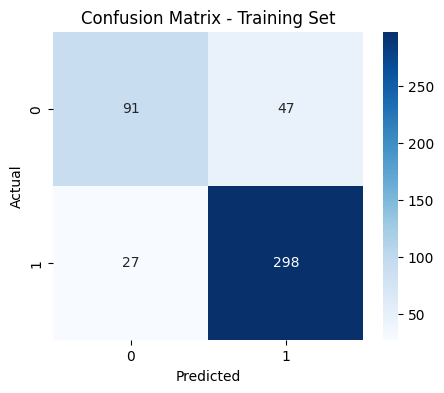

In [708]:
evaluate_model(y_test, y_test_pred, "Test Set")
evaluate_model(y_train, y_train_pred, "Training Set")

**Interpretation:** Based on the evaluation metrics, the Artificial Neural Network (ANN) emerged as the best-performing model among all classifiers. It achieved the highest test accuracy (81.90%), F1 score (0.874), and one of the highest recall scores (0.8902), indicating strong ability to correctly identify positive cases. The model also maintained consistent and high performance on the training set, with an accuracy of 84% and F1 score of 0.89, demonstrating good generalization without overfitting. While other models like Random Forest, KNN, and Logistic Regression performed competitively, ANN consistently delivered the best balance across precision, recall, and F1 score, making it the most effective model for this classification task.

In [709]:
model.save("Ann_model.keras")

In [710]:
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [711]:
model = tf.keras.models.load_model('Ann_model.keras')
preprocessor = joblib.load('preprocessor.pkl')